<a href="https://colab.research.google.com/github/kussy29/machine_learning/blob/main/lab13_towards_self_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Last Homework – Finding Odd Shapes**

Due to the very sad events that took place on the Krakowskie Przedmieście Campus, the semester schedule has changed for the Monday and Thursday groups. To accommodate these changes, students in all groups receive a **combined homework assignment for both Class 13 and Class 14**.

## **RULES**

### **Deadline**

**The deadline for this homework is July 2nd, 23:59.**

### **Grading Criteria**

This homework will be graded on a scale from 0 to 4 points - plus a **bonus**.

- **4 points** (equivalent to completing two homework assignments worth 2 points each):
  - **the solution must attain an RMSE of 5.0 pixels or lower** (on 25,000 samples).
  - the sizes of all tensors must be annotated in comments
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **3 points** (equivalent to completing one homework assignment worth 2 points):
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - the sizes of all tensors must be annotated in comments
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **2 points** (equivalent to completing one homework assignment worth 2 points):
  - missing any one of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **1 point** (equivalent to submitting an incomplete homework assignment):
  - missing any two of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **0 points** (equivalent to not completing the homework assignment):
  - missing any three of the following:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **BONUS** – This homework encompasses all key elements from previous classes on deep neural networks.  
As a result, any student who obtains an **RMSE of 3.0 pixels or below** (on 25,000 samples), and whose solution would otherwise qualify for 4 points, **will receive the full 14 points** — equivalent to completing all homework assignments related to deep learning — regardless of their previous scores.



## **HOMEWORK ASSIGNMENT DESCRIPTION AND INSTRUCTIONS**

### **Online Dataset**

The code provided below generates an *online* dataset `OddXYDataset`.

The term *online* means that the dataset does not have a fixed set of pre-generated examples (like a traditional training set of fixed size). Instead, new samples are generated dynamically each time they are requested.

While the number of possible examples is finite in principle, it is so large that — for practical purposes — we can consider it to be effectively infinite.

In this setting, there is no need to use a separate validation or test set: the training error itself is a good estimate of the generalization error, since every training sample is new and unseen.

Consequently, the notion of an *epoch* becomes a matter of convention. For this assignment, we define one epoch as processing 25,000 training examples.

### **Training strategies**

Overfitting is not a problem in the *online* setting — but training can still stagnate in local minima or flat regions of the loss landscape.  
To address this, you will likely need to try one or more of the following strategies:

- **Multiple restarts** with different random seed values;
- **Adaptive learning rate** — consider researching training schedulers (this topic was not covered in class);
- **Progressive model growth** — start with a simpler architecture and gradually add components during training,
  so that the parts already present can learn what to do before the rest is introduced.

### **DataLoader**

The `show_examples()` function demonstrate how to wrap the dataset into a `torch.utils.data.DataLoader` so it becomes directly usable for the training/testing of a neural network.

### **Data Description**

By examining the provided code and a few sample images generated from this dataset, you will notice that:

1. **Each data sample** is a 64×64 black-and-white image with the following characteristics:
  - It contains several shapes of the same type (either circles, triangles, or squares), randomly placed and varying in size;
  - It includes one additional shape of a different type — the *odd* shape — also placed at a random location;
  
  **Note that these shapes may overlap partially or even completely, potentially hiding the odd shape.**

2. **The label** associated with each image is a 2D point indicating the coordinates of the center of the odd shape.

### **The Homework Objective**

Students should design an architecture of an **attention-based neural network** and train it so that it attains an RMSE (Root Mean Square Error, defined as the square root of the MSE) of **5.0 or lower**. Due to the nature of the online dataset, there is no need to test the solution on a separate test set.

Students should visualize the attention matrices in the trained network and **discuss what they observe** — not just describe them.  
Focus on interpreting the patterns: Where is the model attending? Are there any consistent behaviors across samples? Does attention correlate with the position of the odd shape? What do surprising or unclear patterns tell us?

A few technical requirements to observe:

- Seed all random number generators so that (1) your results are replicable and (2) I can rerun your solution and obtain the same output — *in case I need to check something*.

- Make sure your Colab file contains a **fully trained solution** with:
  - printed training output,
  - attention diagrams,
  - and a plot of the training loss curve.

This way, I don’t have to rerun your code unless absolutely necessary.

### **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.

## **SOLUTION SUGGESTIONS**

Students **do not need to follow these suggestions** — these are simply the strategies that worked for me.

The goal of the homework is, of course, to find the location of the odd shape. For that reason, it seems worthwhile to consider a *position-aware* variant of the post-processing of attention results. The solution I propose consists of the following components:


0. **Input**  
   Our input is a black-and-white image with 1 channel, of size 64×64 pixels.

1. **Embedding**  
  In class, we embedded a sequence of tokens in a multidimensional space, resulting in a sequence of embeddings. We also saw how such sequences are compatible with positional encoding and attention mechanisms used in subsequent stages.

  Here, we need to process an image that contains shapes of interest at various spatial locations.  
  To do this, I designed a Convolutional Neural Network with:
  - 1 input channel,
  - an input grid of 64x64 pixels,
  - and an output feature map arranged as a 12x12 grid with 16 channels.

  I used **no padding**, and each output neuron has a **receptive field of size 20x20** with a **stride of 4x4**.  
  This architectural choice yields **144 distinct positions** (12x12), each represented by a 16-dimensional feature vector.

  We can treat this as a sequence of 144 embeddings in 16-dimensional space — making it fully compatible with the attention mechanisms used later in the model.


2. **Positional Encoding**  
  I applied sinusoidal positional encoding, just like in class, using 16 positional dimensions to match the 16 feature dimensions of the image embeddings.  

  Positions were encoded based on their indices from 0 to 143.

3. **Attention**  
   I used full self-attention, where input tokens are linearly projected into Query, Key, and Value vectors using learned matrices.

4. **Post-Processing**  
   The classifier was implemented as a 2-layer MLP and applied **token-wise**, without averaging over positions.  

   This corresponds to the **position-aware** variant of post-processing the attention results, as discussed in class.

   As a result, the model produced a **logit for each of the 144 spatial locations**, which was then converted with `softmax` into a **probability distribution** over positions — representing the likelihood of the odd shape being located at each position.


5. **Final Prediction**  
   We know the exact position (center) of each of the 144 rectangular receptive fields of the embedding network. Since we also have the **probability** of each field being the target location (from the classifier), we can compute the **expected position** as a weighted average of receptive field centers. In what follows I will call it *soft argmax*.

   **Example:**

   Suppose we had only 4 output rectangles (instead of 144), with centers at:  
   $$(16, 16),\ (16, 48),\ (48, 16),\ \text{and } (48, 48).$$  
   and suppose the probabilities from the post-processing stage were:  
   $$(0.1,\ 0.2,\ 0.69999,\ 0.00001).$$  
   Then the predicted center would be:
   $$
   \begin{align*}
   x &= 16 \cdot 0.1 + 16 \cdot 0.2 + 48 \cdot 0.69999 + 48 \cdot 0.00001 \\
   y &= 16 \cdot 0.1 + 48 \cdot 0.2 + 16 \cdot 0.69999 + 48 \cdot 0.00001
   \end{align*}
   $$

   which yields an interpretable, differentiable prediction for the (x, y) location of the odd shape (*soft argmax*).

**The above steps bring the RMSE below 4.0 pixels.**  
However, the result depends on the network initialization — it is seed-dependent — so it's worth restarting the training a few times with different seeds to find a better-performing run.

To improve this result further, though, we'll have to work a bit harder. Here's how:


6. **Offset Regressor**

  The soft-argmax mechanism in step 5 identifies the **center** of the most probable receptive field, but it cannot fine-tune the prediction within that field. For example, if the odd shape is located in the **lower-left corner** of a receptive field, the best the model can do is predict the **center** of that rectangle — introducing a systematic error.

  *One may argue:* the design naturally accounts for a more nuanced case. When the odd shape lies **across the boundary between two receptive fields**, the attention distribution may spread across both regions. In such cases, the soft-argmax prediction becomes a **weighted average** of the centers of the adjacent fields. This behavior is a built-in **feature of the design** that allows the model to predict positions **off-center**, somewhere in between fields.

  *To that I would reply:* this is true — but it comes with a trade-off. When attention is distributed across multiple regions, it becomes **less clear which shapes are *regular* and which one is *odd***. This added ambiguity may make it harder for the network to reach a confident decision, especially in the early stages of training.

  To address this systematic limitation in a more structured way, I introduced an additional **2-layer MLP regressor**, applied **token-wise** to each of the 144 positions. This regressor takes the same attention output used by the classifier in step 4 and predicts a **local offset** $(\Delta x, \Delta y)$ within each receptive field. These offsets are then **aggregated** using the probabilities from step 4, resulting in a **soft average correction vector**.

  Note that the attention mechanism must learn to extract — from the original features — both:
  - the **probability** that the odd shape is located at a given position, and  
  - the **local coordinates** of that shape *within* the respective receptive field.


7. **Refined Prediction**

  The final predicted position is obtained by summing the **coarse prediction** from step 5 and the **fine-grained correction** from step 6. This allows the model to make accurate, differentiable predictions at **sub-receptive-field resolution**, resulting in significantly improved localization.

  **In summary:**

  - Step 5: predicts the expected center of the relevant receptive field (via soft-argmax);
  - Step 6: estimates a fine-grained, attention-weighted offset within that field;
  - Step 7: adds both components to produce the final prediction:

$$
\text{final prediction} = \underbrace{\sum_i p_i \cdot C_i}_{\text{soft argmax}} + \underbrace{\sum_i p_i \cdot (\Delta x, \Delta y)_i}_{\text{fine correction offset}}
$$


However, I was not able to train this network end-to-end from scratch — it seems that the two heads (the classifier inferring probabilities and the regressor inferring fine-grained corrections) were not able to learn their roles *simultaneously*.  

To solve this, I adopted a **progressive model growth** training strategy:

- First, I trained a one-headed version of the network (without steps 6 and 7) until the RMSE reached approximately 4.0 — a clear indication that the probability distribution was being inferred correctly.
- Then, I copied all weights into a new, complete two-headed network and continued training from that point.

**This strategy brought the RMSE down to 2.65 pixels.**


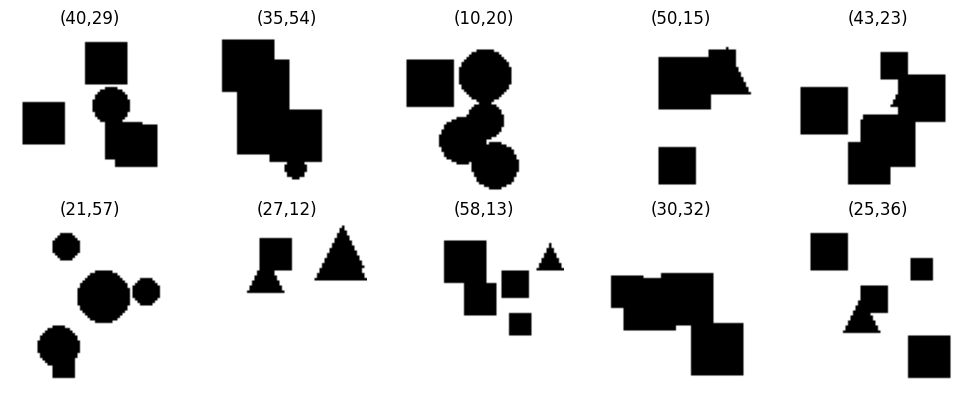

In [1]:
# ============================================================
# 0. Imports & device
# ============================================================
import torch, random, math, numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ============================================================
# 1. Online dataset: 64×64, target = (cx,cy) ∈ [0,63]²  (float32)
# ============================================================
IMAGE = 64
SHAPES = ("circle", "square", "triangle")

def draw_shape(drawer, shape_type, center_x, center_y, radius):
    if shape_type == "circle":
        drawer.ellipse([center_x - radius, center_y - radius,
                        center_x + radius, center_y + radius], fill="black")
    elif shape_type == "square":
        drawer.rectangle([center_x - radius, center_y - radius,
                          center_x + radius, center_y + radius], fill="black")
    else:  # triangle
        drawer.polygon([
            (center_x, center_y - radius),
            (center_x - radius, center_y + radius),
            (center_x + radius, center_y + radius)
        ], fill="black")

class OddXYDataset(Dataset):
    """
    Generates images on-the-fly:
      * several random shapes of the same type
      * 1 additional shape of a different type
    Returns:
      * image (1×64×64 tensor, float32 normalized to [0,1])
      * label: float tensor [cx, cy] with center of the odd shape
    Arguments:
        num_samples             – total number of samples in the dataset
        same_shape_count_range – tuple (min, max), number of identical shapes
        shape_radius_range      – tuple (min_radius, max_radius) for shape size
    """
    def __init__(self,
                 num_samples,
                 same_shape_count_range=(3, 6),
                 shape_radius_range=(4, 10)):
        self.num_samples = num_samples
        self.same_shape_count_range = same_shape_count_range
        self.radius_min, self.radius_max = shape_radius_range

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        base_shape = random.choice(SHAPES)
        odd_shape = random.choice([s for s in SHAPES if s != base_shape])

        img = Image.new("L", (IMAGE, IMAGE), "white")
        drawer = ImageDraw.Draw(img)

        # draw identical shapes
        for _ in range(random.randint(*self.same_shape_count_range)):
            radius = random.randint(self.radius_min, self.radius_max)
            cx = random.randint(radius, IMAGE - radius - 1)
            cy = random.randint(radius, IMAGE - radius - 1)
            draw_shape(drawer, base_shape, cx, cy, radius)

        # draw the odd shape (with known center)
        radius = random.randint(self.radius_min, self.radius_max)
        cx = random.randint(radius, IMAGE - radius - 1)
        cy = random.randint(radius, IMAGE - radius - 1)
        draw_shape(drawer, odd_shape, cx, cy, radius)

        img_tensor = torch.tensor(np.array(img), dtype=torch.float32).unsqueeze(0) / 255.
        label_tensor = torch.tensor([float(cx), float(cy)], dtype=torch.float32)
        return img_tensor, label_tensor

def show_examples(num_examples=10):
    """
    Displays a grid of image samples from OddXYDataset using a DataLoader with batch_size=1.

    Args:
        num_examples (int): Number of examples to display.
    """
    dataset = OddXYDataset(num_samples=num_examples)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

    num_columns = 5
    num_rows = math.ceil(num_examples / num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))

    for i, (image, label) in enumerate(dataloader):
        if i >= num_examples:
            break
        image_np = image.squeeze(0).squeeze(0).numpy()  # B=1,C=1,H,W --> H,W
        cx, cy = label.squeeze(0)                       # B=1,2       --> 2
        axes.flat[i].imshow(image_np, cmap="gray")
        axes.flat[i].set_title(f"({cx:.0f},{cy:.0f})")
        axes.flat[i].axis("off")

    for j in range(i + 1, num_rows * num_columns):
        axes.flat[j].axis("off")

    plt.tight_layout()
    plt.show()



show_examples()

### Modules

Firstly we create attention layer which inlcudes possibility of using multiple heads.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Attention(nn.Module):
    def __init__(self,d_model,d_k, d_v, n_heads):
        super(Attention, self).__init__()
        self.query_proj=nn.Linear(d_model,d_k * n_heads)
        self.keys_proj=nn.Linear(d_model,d_k * n_heads)
        self.values_proj=nn.Linear(d_model,d_v * n_heads)
        self.attention = None
        self.d_model = d_model
        self.d_k = d_k
        self.d_v = d_v
        self.n_heads = n_heads

    def forward(self,query, keys, values):
        B = query.size(0)
        L = query.size(1)
        Q = self.query_proj(query)
        K = self.keys_proj(keys)
        V = self.values_proj(values)

        Q = Q.view(B,L,self.n_heads,-1)
        K = K.view(B,L,self.n_heads,-1)
        V = V.view(B,L,self.n_heads,-1)

        scores = torch.einsum('bqhd,bkhd->bhqk', Q, K)
        scores = scores / np.sqrt((K.size(-1)))

        self.attention = F.softmax(scores, dim=-1)

        output = torch.einsum('bhqk,bkhd->bqhd', self.attention, V)
        output = output.reshape(B,L,-1)

        return output, self.attention


We create CNN module which embeds image to vectors. I assume that it's job is to find shapes looking at contour because triangles, squares and circles have diffrent contours and every channel should look at diffrent type of contour (vertical for squares, diagonal for triangles, etc.)

In [3]:
class CNN(nn.Module):
    def __init__(self, channels, kernel_sizes, strides,conv_dropout):
        super(CNN, self).__init__()
        self.conv_layers = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(
                    in_channels=channels[i],
                    out_channels=channels[i+1],
                    kernel_size=kernel_sizes[i],
                    stride=strides[i],
                    padding='valid'),
                nn.MaxPool2d(2),
                nn.Dropout(conv_dropout)
            )
            for i in range(len(kernel_sizes)-1)
        ])
        self.conv_layers.append(
            nn.Sequential(
            nn.Conv2d(
                in_channels=channels[-2],
                out_channels=channels[-1],
                kernel_size=kernel_sizes[-1],
                stride=strides[-1],
                padding='valid'),
            nn.Dropout(conv_dropout)
        )
    )

    def forward(self,x):
        for layer in self.conv_layers:
            x = layer(x)
        return x


I used typical sinusoidal positial encoding. 

In [4]:
class Pos_Enc(nn.Module):
    def __init__(self, d_model, max_len=1000):
        super(Pos_Enc, self).__init__()
        self.pe = torch.zeros(max_len, d_model)
        self.pe.requires_grad = False

        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = (torch.arange(0, d_model, 2).float()
                * -(math.log(10000.0) / d_model)).exp()

        self.pe[:, 0::2] = torch.sin(position * div_term)
        self.pe[:, 1::2] = torch.cos(position * div_term)

        self.pe = self.pe.unsqueeze(0)

    def forward(self,x):
        return self.pe[:,:x.size(1)].to(x.device)

For decoder I used MLP heads with 2 layer depth with ReLU as activation function.

In [5]:
class MLP(nn.Module):
    def __init__(self,channels,lin_dropout):
        super(MLP, self).__init__()

        self.lin_layers=nn.ModuleList([
            nn.Sequential(
                nn.Linear(
                    channels[i],
                    channels[i+1]),
                nn.ReLU(),
                nn.Dropout(lin_dropout)
            )
            for i in range(len(channels)-2)
        ])
        self.lin_layers.append(
            nn.Sequential(nn.Linear(channels[-2],channels[-1]),
                      nn.Dropout(lin_dropout)))

    def forward(self,x):
        for layer in self.lin_layers:
            x = layer(x)
        return x

### Models

Now I will us modules created above to create base model encoding information from image and final models with one or two heads.

Base model changing 64 x 64 image to 32x144 vectors.

I will use as an embedding CNN:
1. Conv2d : 3x3, stride=1 (output 62x62) channels changed from 1 to 4
2. MaxPool2d : 2x2, stride=2 (output 31x31) 
3. Conv2d : 4x4, stride=1 (output 28x28) channels changed from 4 to 16
4. MaxPool2d : 2x2, stride=2 (output 14x14)
5. Conv2d : 3x3, stride=1 (output 12x12) channels changed from 16 to 32
It will give us receptive field of 20x20 and stride 4x4
Every 1,2 ; 3,4 ; 5 layers have droupout equal to 0.1 to regularize the model.

Later we add positional encoding with max lenght equal to lenght of vector and number of channels equal to 32
And thru attention with 2 heads every one of them with 16 dimensions. I wanted to check how every head would learn and if it would learn radically different things.

Model outputs output of encoder and energies of attention.

In [6]:
class Model(nn.Module):
    def __init__(self, grid ,device):
        super(Model, self).__init__()

        self.cnn=CNN(channels=[1,4,16,32], kernel_sizes=[3,4,3], strides=[1,1,1],conv_dropout=0.1)
        self.pos_enc=Pos_Enc(d_model=32,max_len=144)
        self.attention=Attention(d_model=32,d_k=16,d_v=16,n_heads=2)

        self.energy = None
        self.grid = grid.to(device) #it's unnessesary to have it 

    def forward(self,x):
    # x : B x 1 x 64 x 64
        batch_size = x.size(0)
        x = self.cnn(x) # B x 32 x 12 x 12
        x = torch.flatten(x, start_dim=2, end_dim=3)  # B x 32 x 144
        x = x.permute(0,2,1) # B x 144 x 32
        x = x + self.pos_enc(x) # B x 144 x 32

        x, self.energy = self.attention(x, x, x) # B x 144 x 32
        return x, self.energy




Now I create grid that will be used to produce output. 

In [7]:
# Creating grid
x = np.linspace(0+64/24, 64-64/24, 12) # vector of 12 
y = np.linspace(0+64/24, 64-64/24, 12) # vector of 12 

yy, xx = np.meshgrid(y, x, indexing='ij')
grid_np = np.stack([xx, yy], axis=-1) # 12x12x2 grid

grid = torch.from_numpy(grid_np).float()
grid.requires_grad = False
grid=grid.flatten(start_dim=0, end_dim=1) # 144x2 tensor 

Now I create first model without offset using base model. Ii has this structure of base model and mlp head because I thought that second model (with offset) would also learned encoder, but it wasn't necessary to achieve below 3 RMSE.

We just add model MLP with layers 32 x 8 and 8 x 2 with ReLU between them and then using soft argmax receive output.

In [8]:
class Model_wo_offset(nn.Module):
    def __init__(self, model,mlp_head ,grid,device):
        super(Model_wo_offset, self).__init__()

        self.model = model
        self.model.requires_grad = True
        self.mlp=mlp_head
        self.mlp.requires_grad = True

        self.energy = None
        self.grid = grid.to(device)

    def forward(self,x):

        x, self.energy = self.model(x) # B x 144 x 32

        x = self.mlp(x) # B x 144 x 2

        x = torch.softmax(x, dim=1) # B x 144 x 2

        y=torch.einsum('bld,ld->bld', x, self.grid)
    
        y=torch.sum(y,axis=1)
    
    #y[:,0]=torch.matmul(x[:,:,0],self.grid[:,0])
    #y[:,1]=torch.matmul(x[:,:,1],self.grid[:,1])

        return y, self.energy


Second model would use also base model and first mlp head trained before and second head learning the offset. Construction of second head is identical to first head.

In [9]:
class Model_with_offset(nn.Module):
    def __init__(self, model,mlp_head,mlp_head_2 ,grid ):
        super(Model_with_offset, self).__init__()

        self.model = model
        self.model.requires_grad = False
        self.mlp_1=mlp_head
        self.mlp_1.requires_grad = False

        self.mlp_2=mlp_head_2
        self.mlp_2.requires_grad = True

        self.energy = None
        self.grid = grid.to(device)

    def forward(self,x):

        x, self.energy = self.model(x) # B x 144 x 32

        x_1 = self.mlp_1(x) # B x 144 x 2
        x_1 = torch.softmax(x_1, dim=1) # B x 144 x 2

        x_2 = self.mlp_2(x) # B x 144 x 2
    
        y=torch.einsum('bld,ld->bld', x_1, self.grid)
        y=torch.sum(y,axis=1)
    
        y+=torch.sum(x_1*x_2,axis=1)
    #y = torch.zeros(self.batch_size,2,device=x.device)
    #y[:,0]=torch.matmul(x_1[:,:,0],self.grid[:,0]) + torch.sum(x_1[:,:,0]* x_2[:,:,0], axis=1)
    #y[:,1]=torch.matmul(x_1[:,:,1],self.grid[:,1]) + torch.sum(x_1[:,:,0]* x_2[:,:,0], axis=1)

        return y, self.energy

### Training loop

Firstly I decided to not use scheduler. However second model couldn't achieve RMSE below 3.1. It's because model jumps around minimum because learning rate is to high. After many tries I decided to use StepLR scheduler that multiplies learning rate by gamma after step_size epochs. Training outputs MSE for epochs and for every 100 batches in epochs ( I created that because I assumed that model would need less epochs to learn).  

In [20]:
from torch.utils.data import DataLoader

import time
import torch
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

def train_model(model, epochs=1000, lr=0.001):
    print(f"Working on {device}")
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler= torch.optim.lr_scheduler.StepLR(optimizer, step_size=100,gamma=0.8)
    criterion = torch.nn.MSELoss()

    train_loss_history_epochs = []
    train_loss_history = []


    for epoch in range(epochs):
        data = OddXYDataset(num_samples=25600)
        train_loader = DataLoader(data, batch_size=128, shuffle=False)

        model.train()
        train_loss_sum = 0.0
        train_loss_sum_epoch = 0.0

        i=0

        for batch_inputs, batch_labels in train_loader:
            batch_inputs = batch_inputs.to(device)
            batch_labels = batch_labels.to(device).float()

            optimizer.zero_grad()
            output, _ = model(batch_inputs)  # logits shape: (batch_size, 1)
            loss = criterion(output, batch_labels)
            loss.backward()
            optimizer.step()
            

            train_loss_sum_epoch += loss.item() * batch_inputs.size(0)
            train_loss_sum += loss.item() * batch_inputs.size(0)
            i+=1

            if(i%100==0):
              print(f'Epoch {epoch}: batch {i}: Avg Loss in last 100 batches: {train_loss_sum/100}')
              train_loss_history.append(train_loss_sum/100)
              train_loss_sum = 0.0


        avg_train_loss = train_loss_sum_epoch / 25600
        train_loss_history_epochs.append(avg_train_loss)
        

        scheduler.step()


    return train_loss_history, train_loss_history_epochs


Working on cuda


Since we don't need test and validation function. Test function is for plotting attention maps for 2 heads.

In [16]:
import seaborn as sns

def test(model, num_test):
    model.eval()
    data = OddXYDataset(num_samples=num_test)
    test_loader = DataLoader(data, batch_size=1, shuffle=False)
    for batch_inputs, batch_labels in test_loader:
        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device).float()
        output, energy = model(batch_inputs)

        energy = energy.cpu().detach().numpy()
        output = output.cpu().detach().numpy()[0,:]
        batch_labels = batch_labels.squeeze(0).cpu().detach().numpy()
        batch_inputs = batch_inputs.squeeze(0).squeeze(0).cpu().detach().numpy()

        print(f"Target: {batch_labels}")
        print(f"Prediction: {output}")
        plt.figure(figsize=(10, 10))
        plt.imshow(batch_inputs, cmap="gray")
        plt.scatter(output[0],output[1],label='prediction')
        plt.scatter(batch_labels[0],batch_labels[1],label='target')
        plt.legend()
        plt.show()

        fig, axes = plt.subplots(2, 1, figsize=(20, 20 * 2))
        grid_labels = [f"({x:.1f}, {y:.1f})" for x, y in grid.tolist()]

        for head in range(2):
          attn = energy[0, head]

          ax = axes[head]
          sns.heatmap(attn,
                    xticklabels=grid_labels,
                    yticklabels=grid_labels,
                    cmap="viridis",
                    ax=ax)

          ax.set_title(f'Head {head} of figure {batch_labels}')
          ax.set_xlabel("Attended to")
          ax.set_ylabel("Query position from")

        plt.tight_layout()
        plt.show()



     




I am going to learn model without offset for 2000 epochs since 1000 isn't enough for it to stop learning. The output of this cell shows average MSE for a badge containing 128 examples, so to compute RMSE we need to divide it by 128 and root it (RMSE 3 gives us loss 1152). It was information for me if the model is still learning during training and real resutls are visualized in the cell below. 

In [26]:
torch.manual_seed(24)
np.random.seed(24)

mlp_head = MLP(channels=[32,8,2],lin_dropout=0.1)
base_model = Model(grid=grid,device=device)
base_model.to(device)
model_wo_offset=Model_wo_offset(model=base_model,mlp_head=mlp_head,grid=grid,device=device)
model_wo_offset.to(device)
train_loss_history, train_loss_history_epochs= train_model(model_wo_offset,epochs=2000)

Working on cuda
Epoch 0: batch 100: Avg Loss in last 100 batches: 24866.04912109375
Epoch 0: batch 200: Avg Loss in last 100 batches: 23596.079296875
Epoch 1: batch 100: Avg Loss in last 100 batches: 23318.167109375
Epoch 1: batch 200: Avg Loss in last 100 batches: 23276.783671875
Epoch 2: batch 100: Avg Loss in last 100 batches: 22939.49740234375
Epoch 2: batch 200: Avg Loss in last 100 batches: 23093.8477734375
Epoch 3: batch 100: Avg Loss in last 100 batches: 22897.27916015625
Epoch 3: batch 200: Avg Loss in last 100 batches: 22192.7650390625
Epoch 4: batch 100: Avg Loss in last 100 batches: 20104.388828125
Epoch 4: batch 200: Avg Loss in last 100 batches: 17289.80869140625
Epoch 5: batch 100: Avg Loss in last 100 batches: 12117.99623046875
Epoch 5: batch 200: Avg Loss in last 100 batches: 10062.08666015625
Epoch 6: batch 100: Avg Loss in last 100 batches: 8263.6494140625
Epoch 6: batch 200: Avg Loss in last 100 batches: 7513.189057617187
Epoch 7: batch 100: Avg Loss in last 100 bat

Epoch 59: batch 200: Avg Loss in last 100 batches: 2512.4944458007812
Epoch 60: batch 100: Avg Loss in last 100 batches: 2471.4225732421874
Epoch 60: batch 200: Avg Loss in last 100 batches: 2497.5738305664063
Epoch 61: batch 100: Avg Loss in last 100 batches: 2632.1029052734375
Epoch 61: batch 200: Avg Loss in last 100 batches: 2548.3870092773436
Epoch 62: batch 100: Avg Loss in last 100 batches: 2491.8330651855467
Epoch 62: batch 200: Avg Loss in last 100 batches: 2431.7460815429686
Epoch 63: batch 100: Avg Loss in last 100 batches: 2504.4907421875
Epoch 63: batch 200: Avg Loss in last 100 batches: 2424.0546142578123
Epoch 64: batch 100: Avg Loss in last 100 batches: 2382.302333984375
Epoch 64: batch 200: Avg Loss in last 100 batches: 2529.386990966797
Epoch 65: batch 100: Avg Loss in last 100 batches: 2419.9234020996096
Epoch 65: batch 200: Avg Loss in last 100 batches: 2384.0800170898438
Epoch 66: batch 100: Avg Loss in last 100 batches: 2380.93392578125
Epoch 66: batch 200: Avg Lo

Epoch 118: batch 200: Avg Loss in last 100 batches: 1929.3031842041016
Epoch 119: batch 100: Avg Loss in last 100 batches: 1881.5178747558593
Epoch 119: batch 200: Avg Loss in last 100 batches: 1866.5588763427734
Epoch 120: batch 100: Avg Loss in last 100 batches: 1901.918218383789
Epoch 120: batch 200: Avg Loss in last 100 batches: 1869.937457885742
Epoch 121: batch 100: Avg Loss in last 100 batches: 1850.7798193359374
Epoch 121: batch 200: Avg Loss in last 100 batches: 1808.6635083007814
Epoch 122: batch 100: Avg Loss in last 100 batches: 1823.217801513672
Epoch 122: batch 200: Avg Loss in last 100 batches: 1832.687442626953
Epoch 123: batch 100: Avg Loss in last 100 batches: 1917.5447888183594
Epoch 123: batch 200: Avg Loss in last 100 batches: 1866.130643310547
Epoch 124: batch 100: Avg Loss in last 100 batches: 1775.9947821044923
Epoch 124: batch 200: Avg Loss in last 100 batches: 1759.351098022461
Epoch 125: batch 100: Avg Loss in last 100 batches: 1816.1912573242187
Epoch 125: b

Epoch 176: batch 200: Avg Loss in last 100 batches: 1698.7961029052735
Epoch 177: batch 100: Avg Loss in last 100 batches: 1681.9474182128906
Epoch 177: batch 200: Avg Loss in last 100 batches: 1672.4194342041017
Epoch 178: batch 100: Avg Loss in last 100 batches: 1683.0717016601564
Epoch 178: batch 200: Avg Loss in last 100 batches: 1654.8933251953124
Epoch 179: batch 100: Avg Loss in last 100 batches: 1708.4577990722655
Epoch 179: batch 200: Avg Loss in last 100 batches: 1674.4903302001953
Epoch 180: batch 100: Avg Loss in last 100 batches: 1630.1911322021485
Epoch 180: batch 200: Avg Loss in last 100 batches: 1735.040574951172
Epoch 181: batch 100: Avg Loss in last 100 batches: 1591.3304223632813
Epoch 181: batch 200: Avg Loss in last 100 batches: 1707.2839135742188
Epoch 182: batch 100: Avg Loss in last 100 batches: 1586.5633728027344
Epoch 182: batch 200: Avg Loss in last 100 batches: 1568.57119140625
Epoch 183: batch 100: Avg Loss in last 100 batches: 1666.2544793701172
Epoch 183

Epoch 234: batch 200: Avg Loss in last 100 batches: 1509.3788854980469
Epoch 235: batch 100: Avg Loss in last 100 batches: 1594.0159851074218
Epoch 235: batch 200: Avg Loss in last 100 batches: 1548.9053784179687
Epoch 236: batch 100: Avg Loss in last 100 batches: 1582.7191650390625
Epoch 236: batch 200: Avg Loss in last 100 batches: 1613.183930053711
Epoch 237: batch 100: Avg Loss in last 100 batches: 1526.7952728271484
Epoch 237: batch 200: Avg Loss in last 100 batches: 1484.3839379882813
Epoch 238: batch 100: Avg Loss in last 100 batches: 1598.7959008789062
Epoch 238: batch 200: Avg Loss in last 100 batches: 1542.5105078125
Epoch 239: batch 100: Avg Loss in last 100 batches: 1628.686000366211
Epoch 239: batch 200: Avg Loss in last 100 batches: 1587.2968994140624
Epoch 240: batch 100: Avg Loss in last 100 batches: 1628.088905029297
Epoch 240: batch 200: Avg Loss in last 100 batches: 1607.6122039794923
Epoch 241: batch 100: Avg Loss in last 100 batches: 1504.6566729736328
Epoch 241: b

Epoch 292: batch 200: Avg Loss in last 100 batches: 1498.9092633056641
Epoch 293: batch 100: Avg Loss in last 100 batches: 1571.489932861328
Epoch 293: batch 200: Avg Loss in last 100 batches: 1440.8234985351562
Epoch 294: batch 100: Avg Loss in last 100 batches: 1452.7803057861329
Epoch 294: batch 200: Avg Loss in last 100 batches: 1484.8307330322266
Epoch 295: batch 100: Avg Loss in last 100 batches: 1487.6353625488282
Epoch 295: batch 200: Avg Loss in last 100 batches: 1512.0414056396485
Epoch 296: batch 100: Avg Loss in last 100 batches: 1669.0875329589844
Epoch 296: batch 200: Avg Loss in last 100 batches: 1391.4419018554688
Epoch 297: batch 100: Avg Loss in last 100 batches: 1497.1085345458985
Epoch 297: batch 200: Avg Loss in last 100 batches: 1503.2404028320314
Epoch 298: batch 100: Avg Loss in last 100 batches: 1441.3591711425781
Epoch 298: batch 200: Avg Loss in last 100 batches: 1484.0615930175782
Epoch 299: batch 100: Avg Loss in last 100 batches: 1465.5848870849609
Epoch 2

Epoch 350: batch 200: Avg Loss in last 100 batches: 1424.3996856689453
Epoch 351: batch 100: Avg Loss in last 100 batches: 1377.2534002685547
Epoch 351: batch 200: Avg Loss in last 100 batches: 1478.010844116211
Epoch 352: batch 100: Avg Loss in last 100 batches: 1473.3372784423827
Epoch 352: batch 200: Avg Loss in last 100 batches: 1478.5557550048827
Epoch 353: batch 100: Avg Loss in last 100 batches: 1512.4715478515625
Epoch 353: batch 200: Avg Loss in last 100 batches: 1520.1515789794921
Epoch 354: batch 100: Avg Loss in last 100 batches: 1424.7746228027345
Epoch 354: batch 200: Avg Loss in last 100 batches: 1530.9091717529298
Epoch 355: batch 100: Avg Loss in last 100 batches: 1424.4235150146485
Epoch 355: batch 200: Avg Loss in last 100 batches: 1467.882801513672
Epoch 356: batch 100: Avg Loss in last 100 batches: 1407.6532666015626
Epoch 356: batch 200: Avg Loss in last 100 batches: 1454.2510192871093
Epoch 357: batch 100: Avg Loss in last 100 batches: 1419.12541015625
Epoch 357:

Epoch 408: batch 200: Avg Loss in last 100 batches: 1428.4944104003907
Epoch 409: batch 100: Avg Loss in last 100 batches: 1454.9485333251953
Epoch 409: batch 200: Avg Loss in last 100 batches: 1514.0638458251954
Epoch 410: batch 100: Avg Loss in last 100 batches: 1378.7112048339843
Epoch 410: batch 200: Avg Loss in last 100 batches: 1401.2691607666015
Epoch 411: batch 100: Avg Loss in last 100 batches: 1397.270595703125
Epoch 411: batch 200: Avg Loss in last 100 batches: 1372.933660888672
Epoch 412: batch 100: Avg Loss in last 100 batches: 1394.3470477294923
Epoch 412: batch 200: Avg Loss in last 100 batches: 1503.3746148681641
Epoch 413: batch 100: Avg Loss in last 100 batches: 1379.6463500976563
Epoch 413: batch 200: Avg Loss in last 100 batches: 1416.3126928710938
Epoch 414: batch 100: Avg Loss in last 100 batches: 1401.4120278930664
Epoch 414: batch 200: Avg Loss in last 100 batches: 1413.429774169922
Epoch 415: batch 100: Avg Loss in last 100 batches: 1366.032498779297
Epoch 415:

Epoch 466: batch 200: Avg Loss in last 100 batches: 1390.1372290039062
Epoch 467: batch 100: Avg Loss in last 100 batches: 1397.8144732666015
Epoch 467: batch 200: Avg Loss in last 100 batches: 1423.821259765625
Epoch 468: batch 100: Avg Loss in last 100 batches: 1445.38595703125
Epoch 468: batch 200: Avg Loss in last 100 batches: 1423.386206665039
Epoch 469: batch 100: Avg Loss in last 100 batches: 1402.2004180908202
Epoch 469: batch 200: Avg Loss in last 100 batches: 1441.8821911621094
Epoch 470: batch 100: Avg Loss in last 100 batches: 1388.025590209961
Epoch 470: batch 200: Avg Loss in last 100 batches: 1391.291920776367
Epoch 471: batch 100: Avg Loss in last 100 batches: 1373.8732455444335
Epoch 471: batch 200: Avg Loss in last 100 batches: 1433.3388592529298
Epoch 472: batch 100: Avg Loss in last 100 batches: 1377.6540740966798
Epoch 472: batch 200: Avg Loss in last 100 batches: 1437.388125
Epoch 473: batch 100: Avg Loss in last 100 batches: 1354.839526977539
Epoch 473: batch 200

Epoch 524: batch 200: Avg Loss in last 100 batches: 1427.9874841308595
Epoch 525: batch 100: Avg Loss in last 100 batches: 1332.7252862548828
Epoch 525: batch 200: Avg Loss in last 100 batches: 1338.6362890625
Epoch 526: batch 100: Avg Loss in last 100 batches: 1323.709136352539
Epoch 526: batch 200: Avg Loss in last 100 batches: 1379.4463873291015
Epoch 527: batch 100: Avg Loss in last 100 batches: 1405.7522973632813
Epoch 527: batch 200: Avg Loss in last 100 batches: 1399.066723022461
Epoch 528: batch 100: Avg Loss in last 100 batches: 1283.2639184570312
Epoch 528: batch 200: Avg Loss in last 100 batches: 1391.4905334472655
Epoch 529: batch 100: Avg Loss in last 100 batches: 1310.0372839355468
Epoch 529: batch 200: Avg Loss in last 100 batches: 1381.893077392578
Epoch 530: batch 100: Avg Loss in last 100 batches: 1336.6362768554689
Epoch 530: batch 200: Avg Loss in last 100 batches: 1339.1324230957032
Epoch 531: batch 100: Avg Loss in last 100 batches: 1278.2364074707032
Epoch 531: b

Epoch 582: batch 200: Avg Loss in last 100 batches: 1317.114937133789
Epoch 583: batch 100: Avg Loss in last 100 batches: 1317.4859985351563
Epoch 583: batch 200: Avg Loss in last 100 batches: 1345.8856646728516
Epoch 584: batch 100: Avg Loss in last 100 batches: 1426.3357061767579
Epoch 584: batch 200: Avg Loss in last 100 batches: 1322.0821490478515
Epoch 585: batch 100: Avg Loss in last 100 batches: 1200.181333618164
Epoch 585: batch 200: Avg Loss in last 100 batches: 1277.4281066894532
Epoch 586: batch 100: Avg Loss in last 100 batches: 1374.0091076660156
Epoch 586: batch 200: Avg Loss in last 100 batches: 1361.6158251953125
Epoch 587: batch 100: Avg Loss in last 100 batches: 1263.1029040527344
Epoch 587: batch 200: Avg Loss in last 100 batches: 1329.833549194336
Epoch 588: batch 100: Avg Loss in last 100 batches: 1388.8800311279297
Epoch 588: batch 200: Avg Loss in last 100 batches: 1357.2625634765625
Epoch 589: batch 100: Avg Loss in last 100 batches: 1256.9151745605468
Epoch 589

Epoch 640: batch 200: Avg Loss in last 100 batches: 1298.7822924804686
Epoch 641: batch 100: Avg Loss in last 100 batches: 1353.7686749267577
Epoch 641: batch 200: Avg Loss in last 100 batches: 1375.4746752929686
Epoch 642: batch 100: Avg Loss in last 100 batches: 1327.0463134765625
Epoch 642: batch 200: Avg Loss in last 100 batches: 1449.3657550048829
Epoch 643: batch 100: Avg Loss in last 100 batches: 1388.5116778564452
Epoch 643: batch 200: Avg Loss in last 100 batches: 1257.923374633789
Epoch 644: batch 100: Avg Loss in last 100 batches: 1339.6138568115234
Epoch 644: batch 200: Avg Loss in last 100 batches: 1365.777865600586
Epoch 645: batch 100: Avg Loss in last 100 batches: 1333.2842108154298
Epoch 645: batch 200: Avg Loss in last 100 batches: 1422.0305712890624
Epoch 646: batch 100: Avg Loss in last 100 batches: 1337.6665002441407
Epoch 646: batch 200: Avg Loss in last 100 batches: 1383.6741326904296
Epoch 647: batch 100: Avg Loss in last 100 batches: 1359.644017944336
Epoch 647

Epoch 698: batch 200: Avg Loss in last 100 batches: 1446.6682095336914
Epoch 699: batch 100: Avg Loss in last 100 batches: 1352.5402020263673
Epoch 699: batch 200: Avg Loss in last 100 batches: 1251.5392419433595
Epoch 700: batch 100: Avg Loss in last 100 batches: 1334.966385192871
Epoch 700: batch 200: Avg Loss in last 100 batches: 1322.5782244873046
Epoch 701: batch 100: Avg Loss in last 100 batches: 1370.6718798828124
Epoch 701: batch 200: Avg Loss in last 100 batches: 1268.7923022460936
Epoch 702: batch 100: Avg Loss in last 100 batches: 1382.738592224121
Epoch 702: batch 200: Avg Loss in last 100 batches: 1358.5527142333985
Epoch 703: batch 100: Avg Loss in last 100 batches: 1281.0476812744141
Epoch 703: batch 200: Avg Loss in last 100 batches: 1323.0627136230469
Epoch 704: batch 100: Avg Loss in last 100 batches: 1207.0579504394532
Epoch 704: batch 200: Avg Loss in last 100 batches: 1349.3729296875
Epoch 705: batch 100: Avg Loss in last 100 batches: 1331.7291192626953
Epoch 705: 

Epoch 756: batch 200: Avg Loss in last 100 batches: 1242.9544696044923
Epoch 757: batch 100: Avg Loss in last 100 batches: 1277.8442657470703
Epoch 757: batch 200: Avg Loss in last 100 batches: 1353.927426147461
Epoch 758: batch 100: Avg Loss in last 100 batches: 1287.6464807128907
Epoch 758: batch 200: Avg Loss in last 100 batches: 1301.8048052978515
Epoch 759: batch 100: Avg Loss in last 100 batches: 1318.601416015625
Epoch 759: batch 200: Avg Loss in last 100 batches: 1260.2428881835938
Epoch 760: batch 100: Avg Loss in last 100 batches: 1298.2802838134767
Epoch 760: batch 200: Avg Loss in last 100 batches: 1291.875933227539
Epoch 761: batch 100: Avg Loss in last 100 batches: 1356.9956045532226
Epoch 761: batch 200: Avg Loss in last 100 batches: 1315.5066662597656
Epoch 762: batch 100: Avg Loss in last 100 batches: 1325.030903930664
Epoch 762: batch 200: Avg Loss in last 100 batches: 1309.9184210205078
Epoch 763: batch 100: Avg Loss in last 100 batches: 1273.331792602539
Epoch 763: 

Epoch 814: batch 200: Avg Loss in last 100 batches: 1293.0443585205078
Epoch 815: batch 100: Avg Loss in last 100 batches: 1249.7588458251953
Epoch 815: batch 200: Avg Loss in last 100 batches: 1273.802785949707
Epoch 816: batch 100: Avg Loss in last 100 batches: 1354.1938272094726
Epoch 816: batch 200: Avg Loss in last 100 batches: 1325.4304425048829
Epoch 817: batch 100: Avg Loss in last 100 batches: 1338.3505575561524
Epoch 817: batch 200: Avg Loss in last 100 batches: 1291.61255859375
Epoch 818: batch 100: Avg Loss in last 100 batches: 1279.6376580810547
Epoch 818: batch 200: Avg Loss in last 100 batches: 1336.6608612060547
Epoch 819: batch 100: Avg Loss in last 100 batches: 1248.329298095703
Epoch 819: batch 200: Avg Loss in last 100 batches: 1245.2823922729492
Epoch 820: batch 100: Avg Loss in last 100 batches: 1344.2575756835938
Epoch 820: batch 200: Avg Loss in last 100 batches: 1324.267755126953
Epoch 821: batch 100: Avg Loss in last 100 batches: 1282.657766723633
Epoch 821: b

Epoch 873: batch 100: Avg Loss in last 100 batches: 1334.2352136230468
Epoch 873: batch 200: Avg Loss in last 100 batches: 1235.0254571533203
Epoch 874: batch 100: Avg Loss in last 100 batches: 1321.5705841064453
Epoch 874: batch 200: Avg Loss in last 100 batches: 1326.6639739990235
Epoch 875: batch 100: Avg Loss in last 100 batches: 1323.0005950927734
Epoch 875: batch 200: Avg Loss in last 100 batches: 1254.8688763427735
Epoch 876: batch 100: Avg Loss in last 100 batches: 1252.8897619628906
Epoch 876: batch 200: Avg Loss in last 100 batches: 1315.9959344482422
Epoch 877: batch 100: Avg Loss in last 100 batches: 1278.8218872070313
Epoch 877: batch 200: Avg Loss in last 100 batches: 1311.5287646484376
Epoch 878: batch 100: Avg Loss in last 100 batches: 1219.5179602050782
Epoch 878: batch 200: Avg Loss in last 100 batches: 1318.964557495117
Epoch 879: batch 100: Avg Loss in last 100 batches: 1323.5165393066407
Epoch 879: batch 200: Avg Loss in last 100 batches: 1314.1965551757812
Epoch 8

Epoch 931: batch 100: Avg Loss in last 100 batches: 1294.4400671386718
Epoch 931: batch 200: Avg Loss in last 100 batches: 1330.597260131836
Epoch 932: batch 100: Avg Loss in last 100 batches: 1225.1092224121094
Epoch 932: batch 200: Avg Loss in last 100 batches: 1245.4034521484375
Epoch 933: batch 100: Avg Loss in last 100 batches: 1250.3179724121094
Epoch 933: batch 200: Avg Loss in last 100 batches: 1280.9717150878905
Epoch 934: batch 100: Avg Loss in last 100 batches: 1318.207710571289
Epoch 934: batch 200: Avg Loss in last 100 batches: 1198.1959417724609
Epoch 935: batch 100: Avg Loss in last 100 batches: 1297.2772302246094
Epoch 935: batch 200: Avg Loss in last 100 batches: 1298.3947387695312
Epoch 936: batch 100: Avg Loss in last 100 batches: 1270.8953280639648
Epoch 936: batch 200: Avg Loss in last 100 batches: 1206.560499267578
Epoch 937: batch 100: Avg Loss in last 100 batches: 1376.3832598876952
Epoch 937: batch 200: Avg Loss in last 100 batches: 1260.0098706054687
Epoch 938

Epoch 989: batch 100: Avg Loss in last 100 batches: 1250.6160119628905
Epoch 989: batch 200: Avg Loss in last 100 batches: 1329.5086352539063
Epoch 990: batch 100: Avg Loss in last 100 batches: 1242.6571447753906
Epoch 990: batch 200: Avg Loss in last 100 batches: 1211.436721496582
Epoch 991: batch 100: Avg Loss in last 100 batches: 1314.7164837646485
Epoch 991: batch 200: Avg Loss in last 100 batches: 1235.7466519165039
Epoch 992: batch 100: Avg Loss in last 100 batches: 1327.6592736816406
Epoch 992: batch 200: Avg Loss in last 100 batches: 1290.664546508789
Epoch 993: batch 100: Avg Loss in last 100 batches: 1390.2069354248047
Epoch 993: batch 200: Avg Loss in last 100 batches: 1263.3791876220703
Epoch 994: batch 100: Avg Loss in last 100 batches: 1308.5844494628907
Epoch 994: batch 200: Avg Loss in last 100 batches: 1363.8367791748046
Epoch 995: batch 100: Avg Loss in last 100 batches: 1302.7673767089843
Epoch 995: batch 200: Avg Loss in last 100 batches: 1307.9882147216797
Epoch 99

Epoch 1046: batch 200: Avg Loss in last 100 batches: 1344.2482415771485
Epoch 1047: batch 100: Avg Loss in last 100 batches: 1218.7864370727539
Epoch 1047: batch 200: Avg Loss in last 100 batches: 1293.093179321289
Epoch 1048: batch 100: Avg Loss in last 100 batches: 1250.338292236328
Epoch 1048: batch 200: Avg Loss in last 100 batches: 1281.903974609375
Epoch 1049: batch 100: Avg Loss in last 100 batches: 1368.9848840332031
Epoch 1049: batch 200: Avg Loss in last 100 batches: 1289.7185607910155
Epoch 1050: batch 100: Avg Loss in last 100 batches: 1344.9020690917969
Epoch 1050: batch 200: Avg Loss in last 100 batches: 1234.6108163452147
Epoch 1051: batch 100: Avg Loss in last 100 batches: 1279.2362088012696
Epoch 1051: batch 200: Avg Loss in last 100 batches: 1312.0831121826172
Epoch 1052: batch 100: Avg Loss in last 100 batches: 1227.5075439453126
Epoch 1052: batch 200: Avg Loss in last 100 batches: 1263.8230535888672
Epoch 1053: batch 100: Avg Loss in last 100 batches: 1320.478087768

Epoch 1104: batch 100: Avg Loss in last 100 batches: 1320.2532543945313
Epoch 1104: batch 200: Avg Loss in last 100 batches: 1285.8212200927735
Epoch 1105: batch 100: Avg Loss in last 100 batches: 1237.4422509765625
Epoch 1105: batch 200: Avg Loss in last 100 batches: 1319.5550323486327
Epoch 1106: batch 100: Avg Loss in last 100 batches: 1226.3066583251953
Epoch 1106: batch 200: Avg Loss in last 100 batches: 1252.7794555664063
Epoch 1107: batch 100: Avg Loss in last 100 batches: 1198.7652587890625
Epoch 1107: batch 200: Avg Loss in last 100 batches: 1264.4504760742188
Epoch 1108: batch 100: Avg Loss in last 100 batches: 1239.1719912719727
Epoch 1108: batch 200: Avg Loss in last 100 batches: 1234.3280068969727
Epoch 1109: batch 100: Avg Loss in last 100 batches: 1253.3261505126952
Epoch 1109: batch 200: Avg Loss in last 100 batches: 1230.1716790771484
Epoch 1110: batch 100: Avg Loss in last 100 batches: 1291.984857788086
Epoch 1110: batch 200: Avg Loss in last 100 batches: 1237.0655401

Epoch 1161: batch 200: Avg Loss in last 100 batches: 1250.6565310668946
Epoch 1162: batch 100: Avg Loss in last 100 batches: 1270.028505859375
Epoch 1162: batch 200: Avg Loss in last 100 batches: 1301.9350482177733
Epoch 1163: batch 100: Avg Loss in last 100 batches: 1188.4833331298828
Epoch 1163: batch 200: Avg Loss in last 100 batches: 1261.9291662597657
Epoch 1164: batch 100: Avg Loss in last 100 batches: 1240.7633056640625
Epoch 1164: batch 200: Avg Loss in last 100 batches: 1183.3050445556642
Epoch 1165: batch 100: Avg Loss in last 100 batches: 1326.2980145263673
Epoch 1165: batch 200: Avg Loss in last 100 batches: 1274.4548651123048
Epoch 1166: batch 100: Avg Loss in last 100 batches: 1409.6529989624023
Epoch 1166: batch 200: Avg Loss in last 100 batches: 1208.9427661132813
Epoch 1167: batch 100: Avg Loss in last 100 batches: 1293.131563720703
Epoch 1167: batch 200: Avg Loss in last 100 batches: 1311.941364135742
Epoch 1168: batch 100: Avg Loss in last 100 batches: 1238.357801513

Epoch 1219: batch 100: Avg Loss in last 100 batches: 1214.0521166992187
Epoch 1219: batch 200: Avg Loss in last 100 batches: 1254.9146417236327
Epoch 1220: batch 100: Avg Loss in last 100 batches: 1294.390198364258
Epoch 1220: batch 200: Avg Loss in last 100 batches: 1323.9009088134765
Epoch 1221: batch 100: Avg Loss in last 100 batches: 1282.6797357177734
Epoch 1221: batch 200: Avg Loss in last 100 batches: 1293.1782211303712
Epoch 1222: batch 100: Avg Loss in last 100 batches: 1305.0280963134765
Epoch 1222: batch 200: Avg Loss in last 100 batches: 1230.9448138427733
Epoch 1223: batch 100: Avg Loss in last 100 batches: 1312.3516589355468
Epoch 1223: batch 200: Avg Loss in last 100 batches: 1337.0809020996094
Epoch 1224: batch 100: Avg Loss in last 100 batches: 1321.6511602783203
Epoch 1224: batch 200: Avg Loss in last 100 batches: 1313.048369140625
Epoch 1225: batch 100: Avg Loss in last 100 batches: 1293.6933233642578
Epoch 1225: batch 200: Avg Loss in last 100 batches: 1288.50570037

Epoch 1276: batch 200: Avg Loss in last 100 batches: 1240.3674993896484
Epoch 1277: batch 100: Avg Loss in last 100 batches: 1234.8666040039063
Epoch 1277: batch 200: Avg Loss in last 100 batches: 1372.3795172119142
Epoch 1278: batch 100: Avg Loss in last 100 batches: 1286.7911627197266
Epoch 1278: batch 200: Avg Loss in last 100 batches: 1259.4079205322266
Epoch 1279: batch 100: Avg Loss in last 100 batches: 1290.1784954833984
Epoch 1279: batch 200: Avg Loss in last 100 batches: 1344.1233996582032
Epoch 1280: batch 100: Avg Loss in last 100 batches: 1149.1237731933593
Epoch 1280: batch 200: Avg Loss in last 100 batches: 1207.155131225586
Epoch 1281: batch 100: Avg Loss in last 100 batches: 1336.483412475586
Epoch 1281: batch 200: Avg Loss in last 100 batches: 1275.8195080566406
Epoch 1282: batch 100: Avg Loss in last 100 batches: 1231.5025653076173
Epoch 1282: batch 200: Avg Loss in last 100 batches: 1267.0086108398436
Epoch 1283: batch 100: Avg Loss in last 100 batches: 1229.80830566

Epoch 1334: batch 100: Avg Loss in last 100 batches: 1272.9497564697265
Epoch 1334: batch 200: Avg Loss in last 100 batches: 1253.2993798828124
Epoch 1335: batch 100: Avg Loss in last 100 batches: 1276.7736181640626
Epoch 1335: batch 200: Avg Loss in last 100 batches: 1336.889840698242
Epoch 1336: batch 100: Avg Loss in last 100 batches: 1311.415914001465
Epoch 1336: batch 200: Avg Loss in last 100 batches: 1234.2382232666016
Epoch 1337: batch 100: Avg Loss in last 100 batches: 1348.0636602783204
Epoch 1337: batch 200: Avg Loss in last 100 batches: 1286.3666931152343
Epoch 1338: batch 100: Avg Loss in last 100 batches: 1239.6612933349609
Epoch 1338: batch 200: Avg Loss in last 100 batches: 1314.023360595703
Epoch 1339: batch 100: Avg Loss in last 100 batches: 1304.2593096923829
Epoch 1339: batch 200: Avg Loss in last 100 batches: 1275.0013763427735
Epoch 1340: batch 100: Avg Loss in last 100 batches: 1312.869696044922
Epoch 1340: batch 200: Avg Loss in last 100 batches: 1309.3753009033

Epoch 1391: batch 200: Avg Loss in last 100 batches: 1171.2446984863282
Epoch 1392: batch 100: Avg Loss in last 100 batches: 1241.2071545410156
Epoch 1392: batch 200: Avg Loss in last 100 batches: 1288.0802584838866
Epoch 1393: batch 100: Avg Loss in last 100 batches: 1259.8851623535156
Epoch 1393: batch 200: Avg Loss in last 100 batches: 1179.7440100097656
Epoch 1394: batch 100: Avg Loss in last 100 batches: 1275.4749935913087
Epoch 1394: batch 200: Avg Loss in last 100 batches: 1265.491774597168
Epoch 1395: batch 100: Avg Loss in last 100 batches: 1252.9558880615234
Epoch 1395: batch 200: Avg Loss in last 100 batches: 1212.8517315673828
Epoch 1396: batch 100: Avg Loss in last 100 batches: 1265.182156982422
Epoch 1396: batch 200: Avg Loss in last 100 batches: 1221.1983560180663
Epoch 1397: batch 100: Avg Loss in last 100 batches: 1202.7172747802733
Epoch 1397: batch 200: Avg Loss in last 100 batches: 1219.8274310302734
Epoch 1398: batch 100: Avg Loss in last 100 batches: 1290.70674194

Epoch 1449: batch 100: Avg Loss in last 100 batches: 1248.0179437255858
Epoch 1449: batch 200: Avg Loss in last 100 batches: 1310.7722723388672
Epoch 1450: batch 100: Avg Loss in last 100 batches: 1295.647894897461
Epoch 1450: batch 200: Avg Loss in last 100 batches: 1277.9106680297853
Epoch 1451: batch 100: Avg Loss in last 100 batches: 1280.1883422851563
Epoch 1451: batch 200: Avg Loss in last 100 batches: 1330.5711981201173
Epoch 1452: batch 100: Avg Loss in last 100 batches: 1232.220546875
Epoch 1452: batch 200: Avg Loss in last 100 batches: 1321.519810180664
Epoch 1453: batch 100: Avg Loss in last 100 batches: 1260.3824157714844
Epoch 1453: batch 200: Avg Loss in last 100 batches: 1187.169907836914
Epoch 1454: batch 100: Avg Loss in last 100 batches: 1253.8354486083983
Epoch 1454: batch 200: Avg Loss in last 100 batches: 1220.520971069336
Epoch 1455: batch 100: Avg Loss in last 100 batches: 1183.0530364990234
Epoch 1455: batch 200: Avg Loss in last 100 batches: 1266.0050317382813


Epoch 1506: batch 200: Avg Loss in last 100 batches: 1268.9462268066407
Epoch 1507: batch 100: Avg Loss in last 100 batches: 1223.8637994384765
Epoch 1507: batch 200: Avg Loss in last 100 batches: 1246.5218267822265
Epoch 1508: batch 100: Avg Loss in last 100 batches: 1290.8979620361329
Epoch 1508: batch 200: Avg Loss in last 100 batches: 1301.9597833251953
Epoch 1509: batch 100: Avg Loss in last 100 batches: 1338.5470434570314
Epoch 1509: batch 200: Avg Loss in last 100 batches: 1216.6283013916016
Epoch 1510: batch 100: Avg Loss in last 100 batches: 1200.8078900146484
Epoch 1510: batch 200: Avg Loss in last 100 batches: 1266.9955694580078
Epoch 1511: batch 100: Avg Loss in last 100 batches: 1249.3759576416016
Epoch 1511: batch 200: Avg Loss in last 100 batches: 1302.4147137451173
Epoch 1512: batch 100: Avg Loss in last 100 batches: 1293.368125
Epoch 1512: batch 200: Avg Loss in last 100 batches: 1294.61873046875
Epoch 1513: batch 100: Avg Loss in last 100 batches: 1246.0469061279298
E

Epoch 1564: batch 100: Avg Loss in last 100 batches: 1295.3409936523437
Epoch 1564: batch 200: Avg Loss in last 100 batches: 1277.8112243652345
Epoch 1565: batch 100: Avg Loss in last 100 batches: 1236.6075509643554
Epoch 1565: batch 200: Avg Loss in last 100 batches: 1247.5468746948243
Epoch 1566: batch 100: Avg Loss in last 100 batches: 1295.1784539794921
Epoch 1566: batch 200: Avg Loss in last 100 batches: 1205.4662628173828
Epoch 1567: batch 100: Avg Loss in last 100 batches: 1320.73784576416
Epoch 1567: batch 200: Avg Loss in last 100 batches: 1162.03302154541
Epoch 1568: batch 100: Avg Loss in last 100 batches: 1226.2987292480468
Epoch 1568: batch 200: Avg Loss in last 100 batches: 1209.234402770996
Epoch 1569: batch 100: Avg Loss in last 100 batches: 1255.2972937011718
Epoch 1569: batch 200: Avg Loss in last 100 batches: 1221.5487316894532
Epoch 1570: batch 100: Avg Loss in last 100 batches: 1250.644364013672
Epoch 1570: batch 200: Avg Loss in last 100 batches: 1241.932316284179

Epoch 1621: batch 200: Avg Loss in last 100 batches: 1209.2002911376953
Epoch 1622: batch 100: Avg Loss in last 100 batches: 1235.1841235351562
Epoch 1622: batch 200: Avg Loss in last 100 batches: 1328.030953979492
Epoch 1623: batch 100: Avg Loss in last 100 batches: 1309.8660247802734
Epoch 1623: batch 200: Avg Loss in last 100 batches: 1317.8798474121095
Epoch 1624: batch 100: Avg Loss in last 100 batches: 1295.0934936523438
Epoch 1624: batch 200: Avg Loss in last 100 batches: 1171.9342736816407
Epoch 1625: batch 100: Avg Loss in last 100 batches: 1311.1962756347657
Epoch 1625: batch 200: Avg Loss in last 100 batches: 1188.6484979248046
Epoch 1626: batch 100: Avg Loss in last 100 batches: 1244.8559600830079
Epoch 1626: batch 200: Avg Loss in last 100 batches: 1206.2880535888671
Epoch 1627: batch 100: Avg Loss in last 100 batches: 1181.6149243164064
Epoch 1627: batch 200: Avg Loss in last 100 batches: 1282.604028930664
Epoch 1628: batch 100: Avg Loss in last 100 batches: 1229.21987182

Epoch 1679: batch 100: Avg Loss in last 100 batches: 1218.5252099609374
Epoch 1679: batch 200: Avg Loss in last 100 batches: 1348.003962097168
Epoch 1680: batch 100: Avg Loss in last 100 batches: 1262.9552117919923
Epoch 1680: batch 200: Avg Loss in last 100 batches: 1214.1518505859376
Epoch 1681: batch 100: Avg Loss in last 100 batches: 1220.7335543823242
Epoch 1681: batch 200: Avg Loss in last 100 batches: 1276.668740234375
Epoch 1682: batch 100: Avg Loss in last 100 batches: 1329.1683355712892
Epoch 1682: batch 200: Avg Loss in last 100 batches: 1244.5795010375978
Epoch 1683: batch 100: Avg Loss in last 100 batches: 1265.5579321289063
Epoch 1683: batch 200: Avg Loss in last 100 batches: 1254.2426641845702
Epoch 1684: batch 100: Avg Loss in last 100 batches: 1330.2675396728516
Epoch 1684: batch 200: Avg Loss in last 100 batches: 1206.9660571289062
Epoch 1685: batch 100: Avg Loss in last 100 batches: 1236.1638525390624
Epoch 1685: batch 200: Avg Loss in last 100 batches: 1214.56935119

Epoch 1736: batch 200: Avg Loss in last 100 batches: 1255.6972537231445
Epoch 1737: batch 100: Avg Loss in last 100 batches: 1220.115018310547
Epoch 1737: batch 200: Avg Loss in last 100 batches: 1249.2011889648438
Epoch 1738: batch 100: Avg Loss in last 100 batches: 1266.744633178711
Epoch 1738: batch 200: Avg Loss in last 100 batches: 1262.3261517333985
Epoch 1739: batch 100: Avg Loss in last 100 batches: 1198.829384765625
Epoch 1739: batch 200: Avg Loss in last 100 batches: 1286.3978924560547
Epoch 1740: batch 100: Avg Loss in last 100 batches: 1230.0112503051757
Epoch 1740: batch 200: Avg Loss in last 100 batches: 1210.911856689453
Epoch 1741: batch 100: Avg Loss in last 100 batches: 1294.8425006103516
Epoch 1741: batch 200: Avg Loss in last 100 batches: 1224.524591064453
Epoch 1742: batch 100: Avg Loss in last 100 batches: 1251.7005786132813
Epoch 1742: batch 200: Avg Loss in last 100 batches: 1256.6115393066407
Epoch 1743: batch 100: Avg Loss in last 100 batches: 1239.48185241699

Epoch 1794: batch 100: Avg Loss in last 100 batches: 1276.0058673095702
Epoch 1794: batch 200: Avg Loss in last 100 batches: 1246.9959429931641
Epoch 1795: batch 100: Avg Loss in last 100 batches: 1224.3129388427735
Epoch 1795: batch 200: Avg Loss in last 100 batches: 1187.0718762207032
Epoch 1796: batch 100: Avg Loss in last 100 batches: 1248.1458947753906
Epoch 1796: batch 200: Avg Loss in last 100 batches: 1330.0263189697266
Epoch 1797: batch 100: Avg Loss in last 100 batches: 1222.9608917236328
Epoch 1797: batch 200: Avg Loss in last 100 batches: 1316.4572903442383
Epoch 1798: batch 100: Avg Loss in last 100 batches: 1272.6992742919922
Epoch 1798: batch 200: Avg Loss in last 100 batches: 1264.3408459472657
Epoch 1799: batch 100: Avg Loss in last 100 batches: 1301.082183532715
Epoch 1799: batch 200: Avg Loss in last 100 batches: 1268.476111755371
Epoch 1800: batch 100: Avg Loss in last 100 batches: 1221.7287628173829
Epoch 1800: batch 200: Avg Loss in last 100 batches: 1229.37335937

Epoch 1851: batch 200: Avg Loss in last 100 batches: 1212.7688641357422
Epoch 1852: batch 100: Avg Loss in last 100 batches: 1302.7028607177735
Epoch 1852: batch 200: Avg Loss in last 100 batches: 1219.383466796875
Epoch 1853: batch 100: Avg Loss in last 100 batches: 1292.0194091796875
Epoch 1853: batch 200: Avg Loss in last 100 batches: 1257.1034771728516
Epoch 1854: batch 100: Avg Loss in last 100 batches: 1337.1747082519532
Epoch 1854: batch 200: Avg Loss in last 100 batches: 1262.6534872436523
Epoch 1855: batch 100: Avg Loss in last 100 batches: 1227.608374633789
Epoch 1855: batch 200: Avg Loss in last 100 batches: 1266.822936401367
Epoch 1856: batch 100: Avg Loss in last 100 batches: 1180.398304748535
Epoch 1856: batch 200: Avg Loss in last 100 batches: 1216.6813177490235
Epoch 1857: batch 100: Avg Loss in last 100 batches: 1232.0713763427734
Epoch 1857: batch 200: Avg Loss in last 100 batches: 1224.6140258789062
Epoch 1858: batch 100: Avg Loss in last 100 batches: 1214.1736853027

Epoch 1909: batch 100: Avg Loss in last 100 batches: 1207.846487426758
Epoch 1909: batch 200: Avg Loss in last 100 batches: 1295.6528887939453
Epoch 1910: batch 100: Avg Loss in last 100 batches: 1208.8580010986327
Epoch 1910: batch 200: Avg Loss in last 100 batches: 1118.6112481689454
Epoch 1911: batch 100: Avg Loss in last 100 batches: 1146.5614862060547
Epoch 1911: batch 200: Avg Loss in last 100 batches: 1213.331226196289
Epoch 1912: batch 100: Avg Loss in last 100 batches: 1240.4156005859375
Epoch 1912: batch 200: Avg Loss in last 100 batches: 1175.7870727539062
Epoch 1913: batch 100: Avg Loss in last 100 batches: 1305.1875958251953
Epoch 1913: batch 200: Avg Loss in last 100 batches: 1173.79466796875
Epoch 1914: batch 100: Avg Loss in last 100 batches: 1229.3179583740234
Epoch 1914: batch 200: Avg Loss in last 100 batches: 1231.0781329345702
Epoch 1915: batch 100: Avg Loss in last 100 batches: 1188.7043743896484
Epoch 1915: batch 200: Avg Loss in last 100 batches: 1335.7861175537

Epoch 1966: batch 200: Avg Loss in last 100 batches: 1368.6379833984374
Epoch 1967: batch 100: Avg Loss in last 100 batches: 1229.2874487304687
Epoch 1967: batch 200: Avg Loss in last 100 batches: 1246.590930480957
Epoch 1968: batch 100: Avg Loss in last 100 batches: 1249.1727493286132
Epoch 1968: batch 200: Avg Loss in last 100 batches: 1248.0608334350586
Epoch 1969: batch 100: Avg Loss in last 100 batches: 1252.109808959961
Epoch 1969: batch 200: Avg Loss in last 100 batches: 1228.0300100708007
Epoch 1970: batch 100: Avg Loss in last 100 batches: 1295.2589514160156
Epoch 1970: batch 200: Avg Loss in last 100 batches: 1157.9139929199218
Epoch 1971: batch 100: Avg Loss in last 100 batches: 1191.776187133789
Epoch 1971: batch 200: Avg Loss in last 100 batches: 1287.6706463623048
Epoch 1972: batch 100: Avg Loss in last 100 batches: 1307.6799432373048
Epoch 1972: batch 200: Avg Loss in last 100 batches: 1188.5051867675782
Epoch 1973: batch 100: Avg Loss in last 100 batches: 1296.778274536

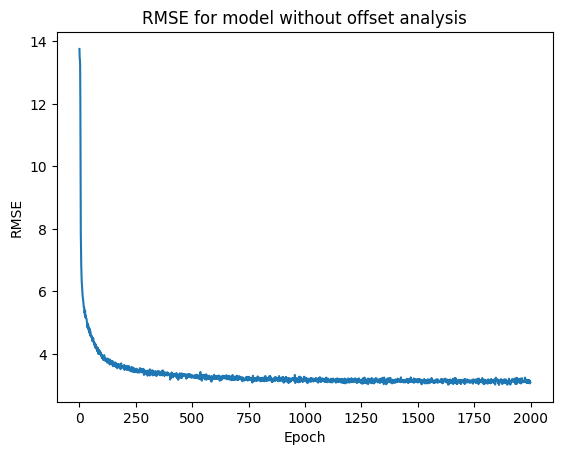

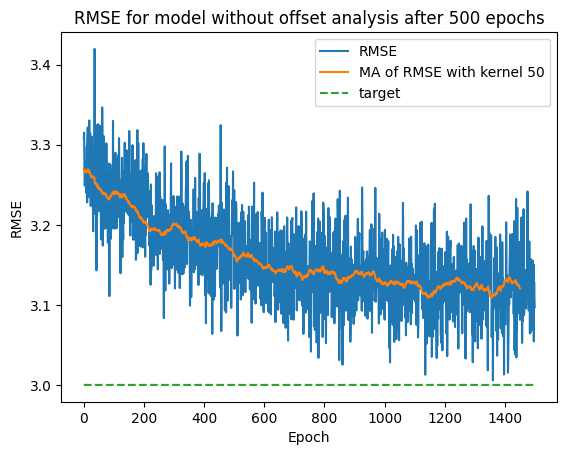

In [45]:
plt.plot(np.sqrt(train_loss_history_epochs))
plt.title('RMSE for model without offset analysis')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

plt.plot(np.sqrt(train_loss_history_epochs[500:]),label='RMSE')
plt.plot(np.convolve(np.sqrt(train_loss_history_epochs[500:]),np.ones(50), mode='valid' )/50, label='MA of RMSE with kernel 50' )
plt.title('RMSE for model without offset analysis after 500 epochs')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.plot(np.arange(1500), 3*np.ones(1500), linestyle='--',label='target')
plt.legend()
plt.show()

As we can see


I am going to plot attention maps for 2 heads for 5 examples. I'm not going to do it again for offset model since it's not training the attention module only its MLP head.

Target: [55. 44.]
Prediction: [53.794926 46.979843]


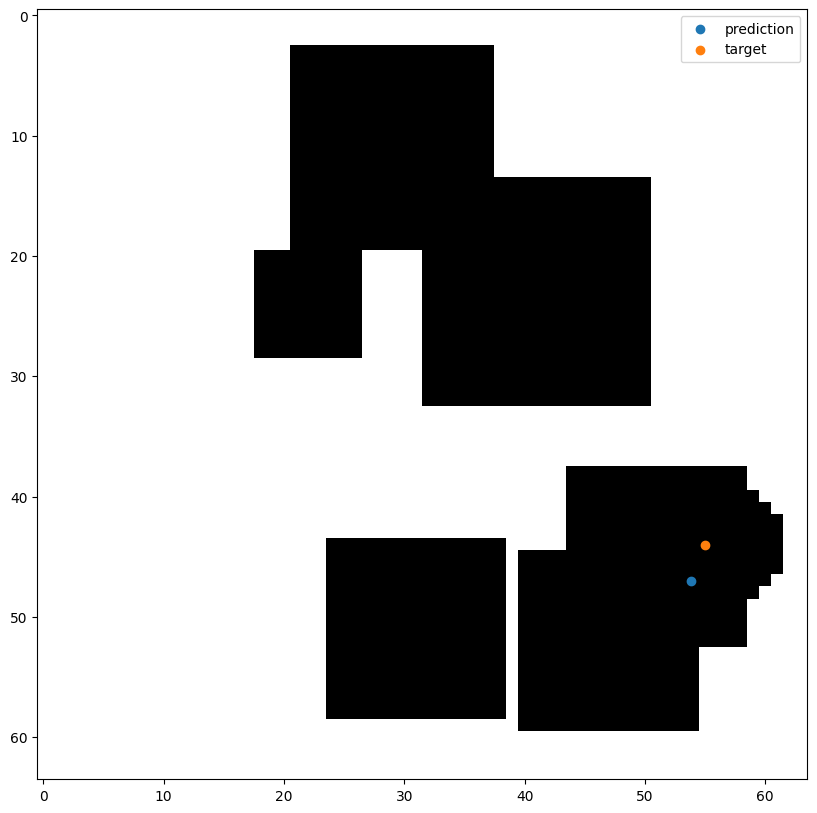

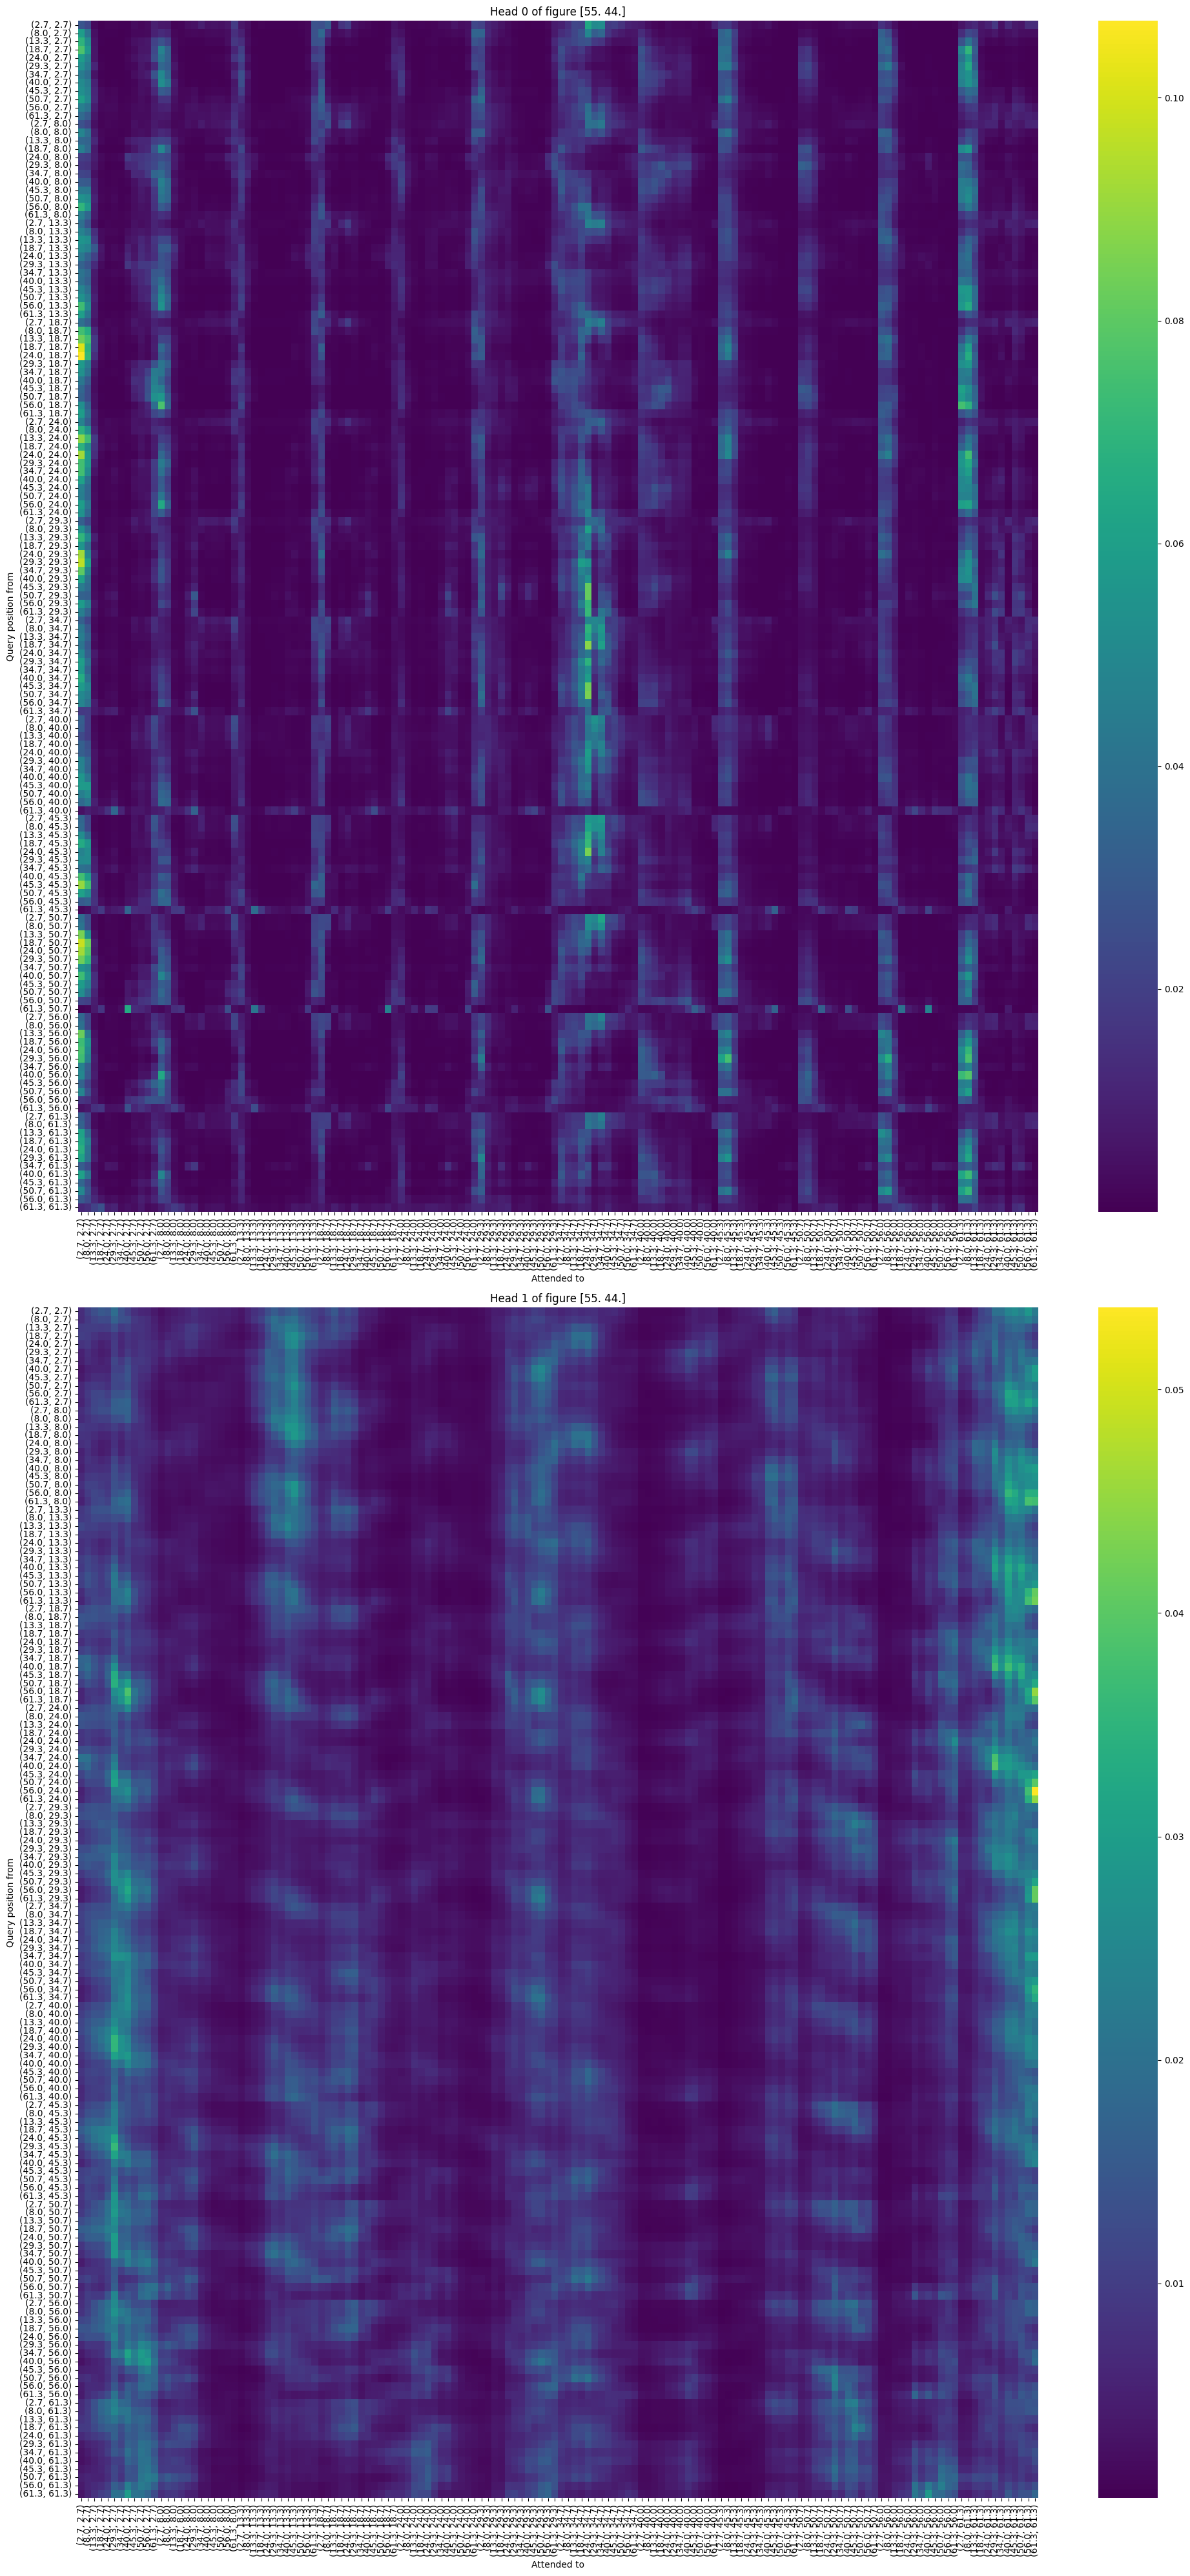

Target: [47. 16.]
Prediction: [46.755592 17.474646]


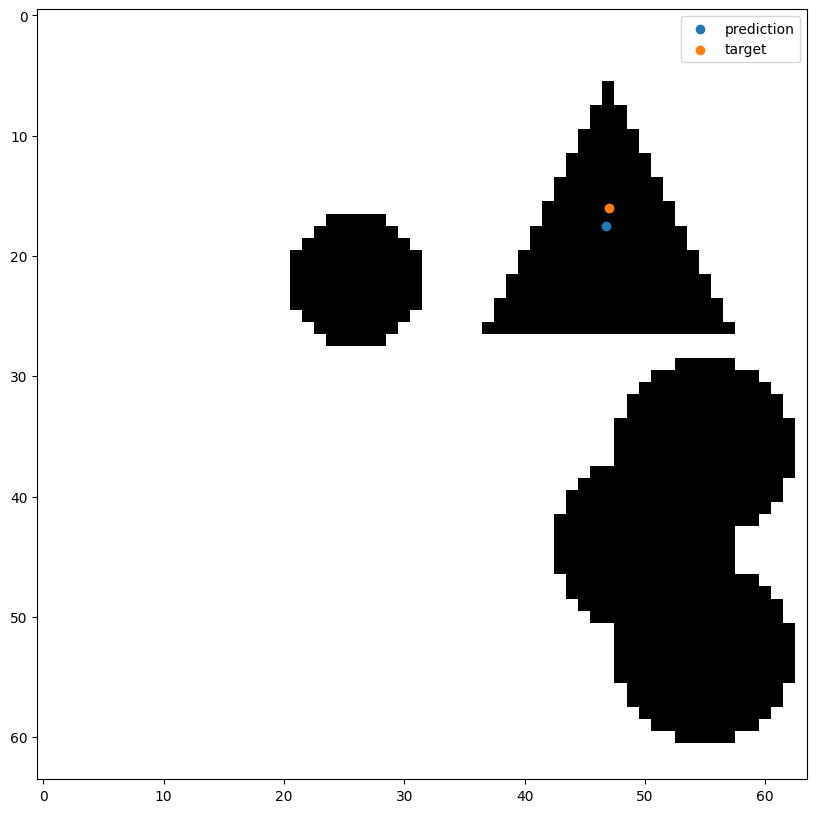

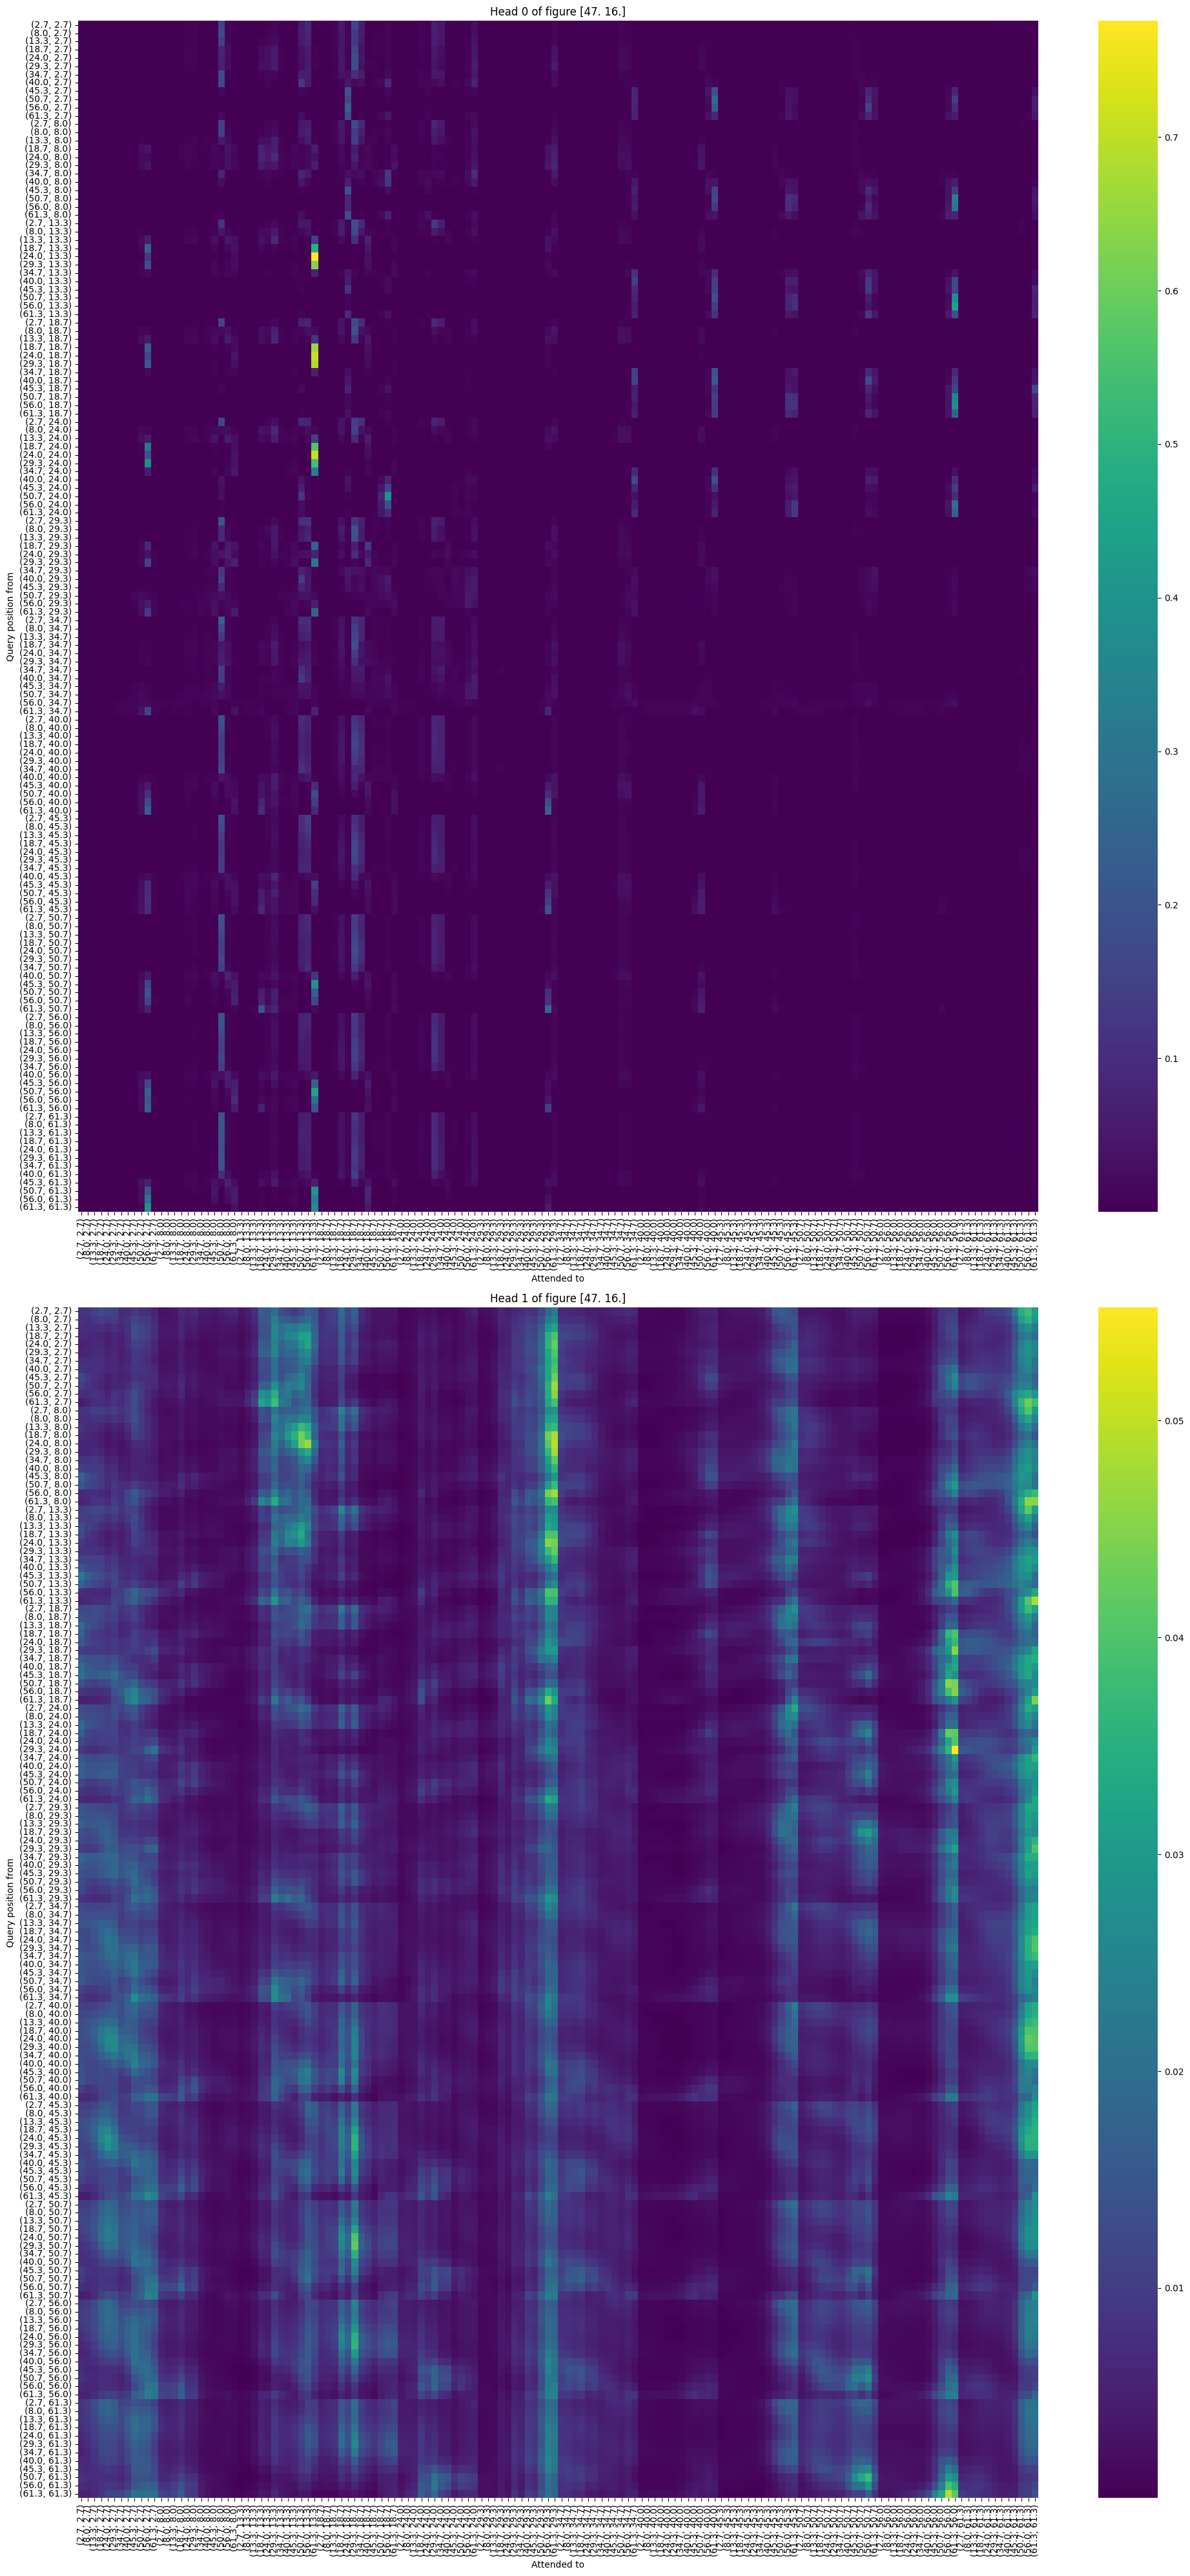

Target: [17. 45.]
Prediction: [20.717302 54.851765]


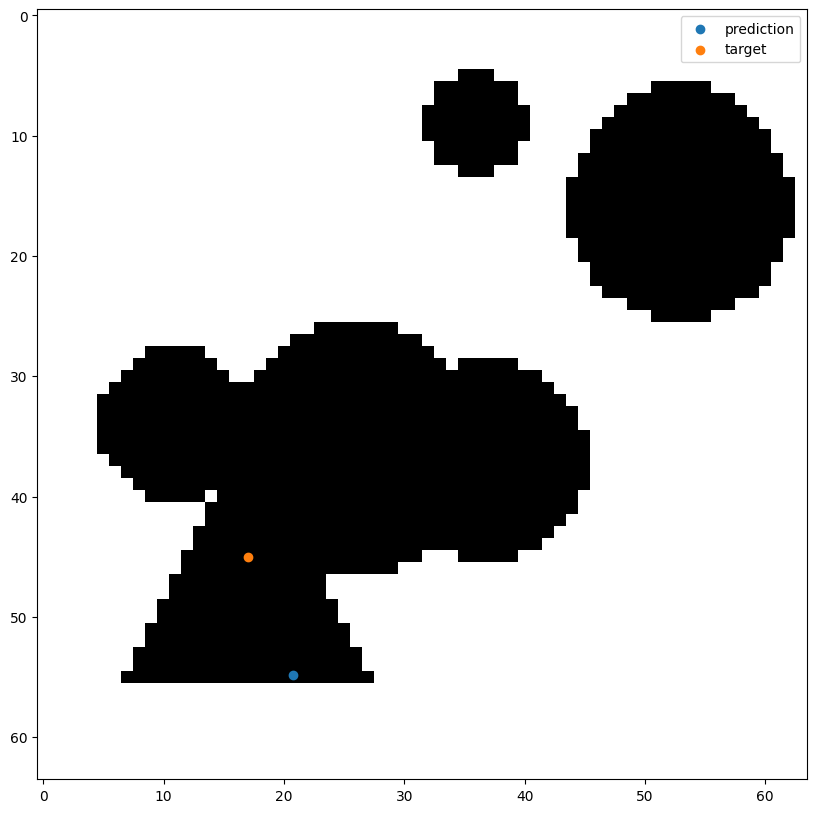

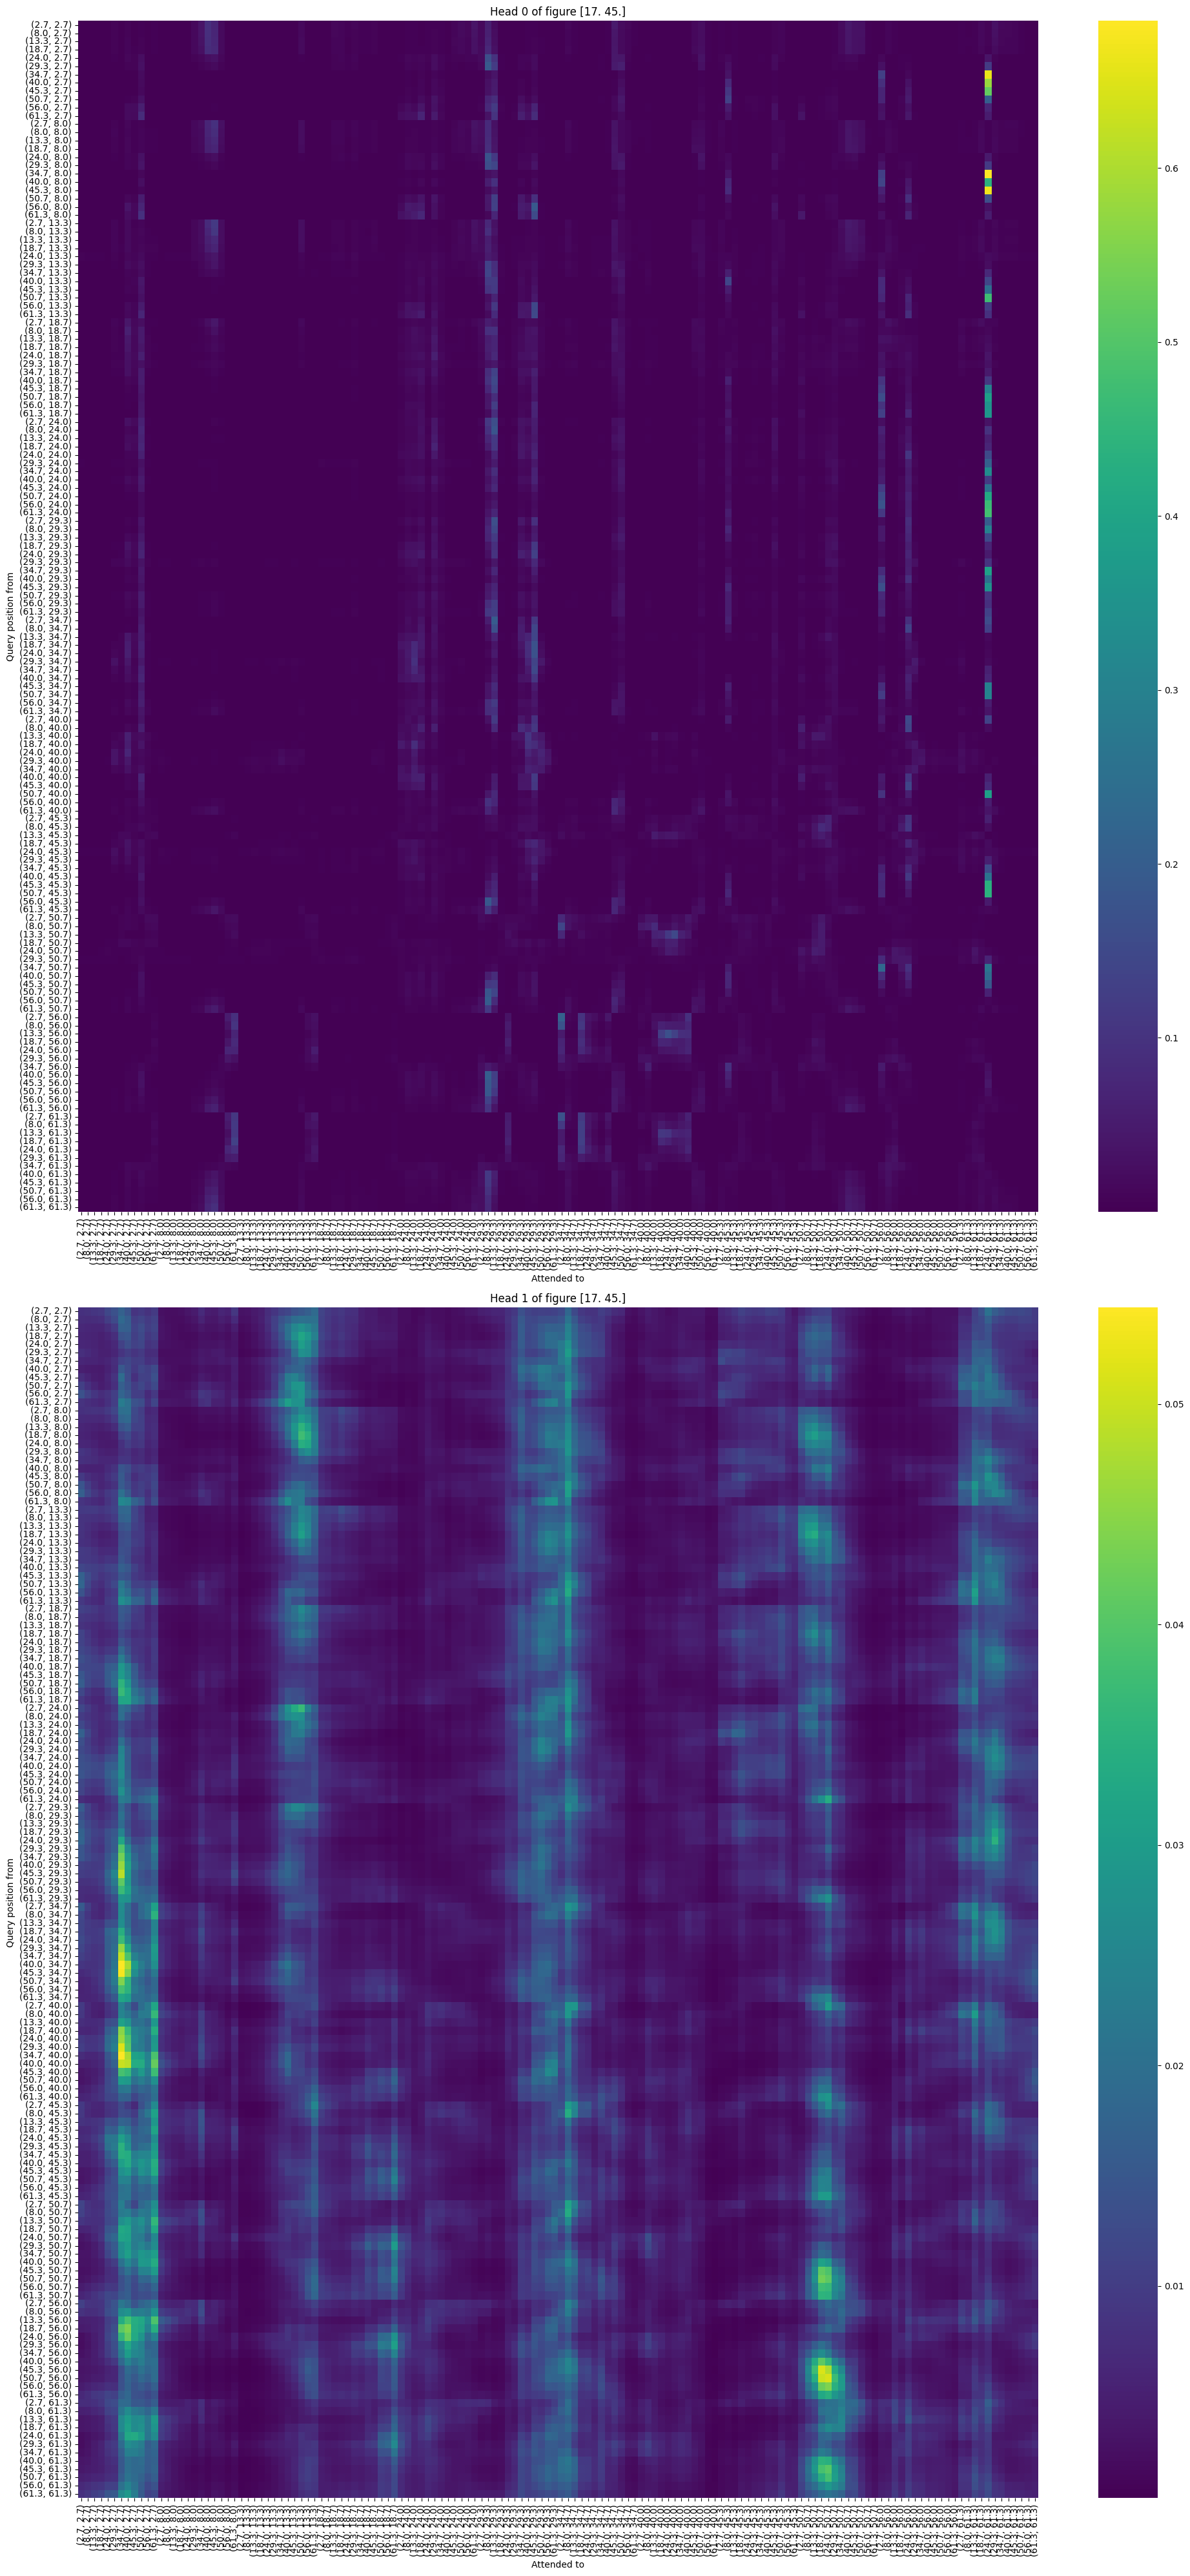

Target: [30. 56.]
Prediction: [35.65629  58.233402]


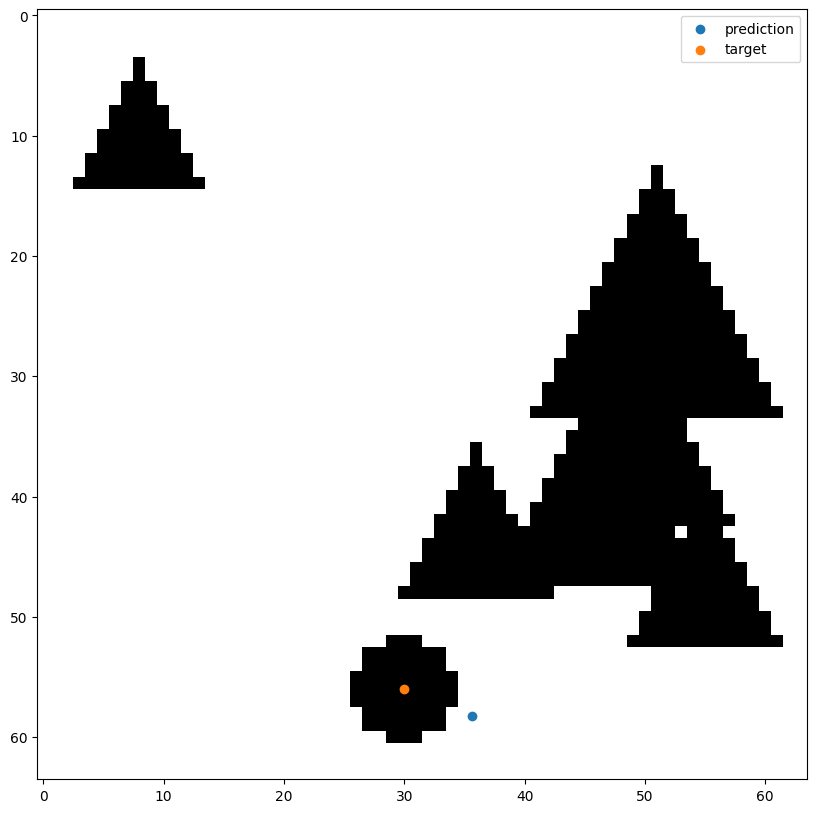

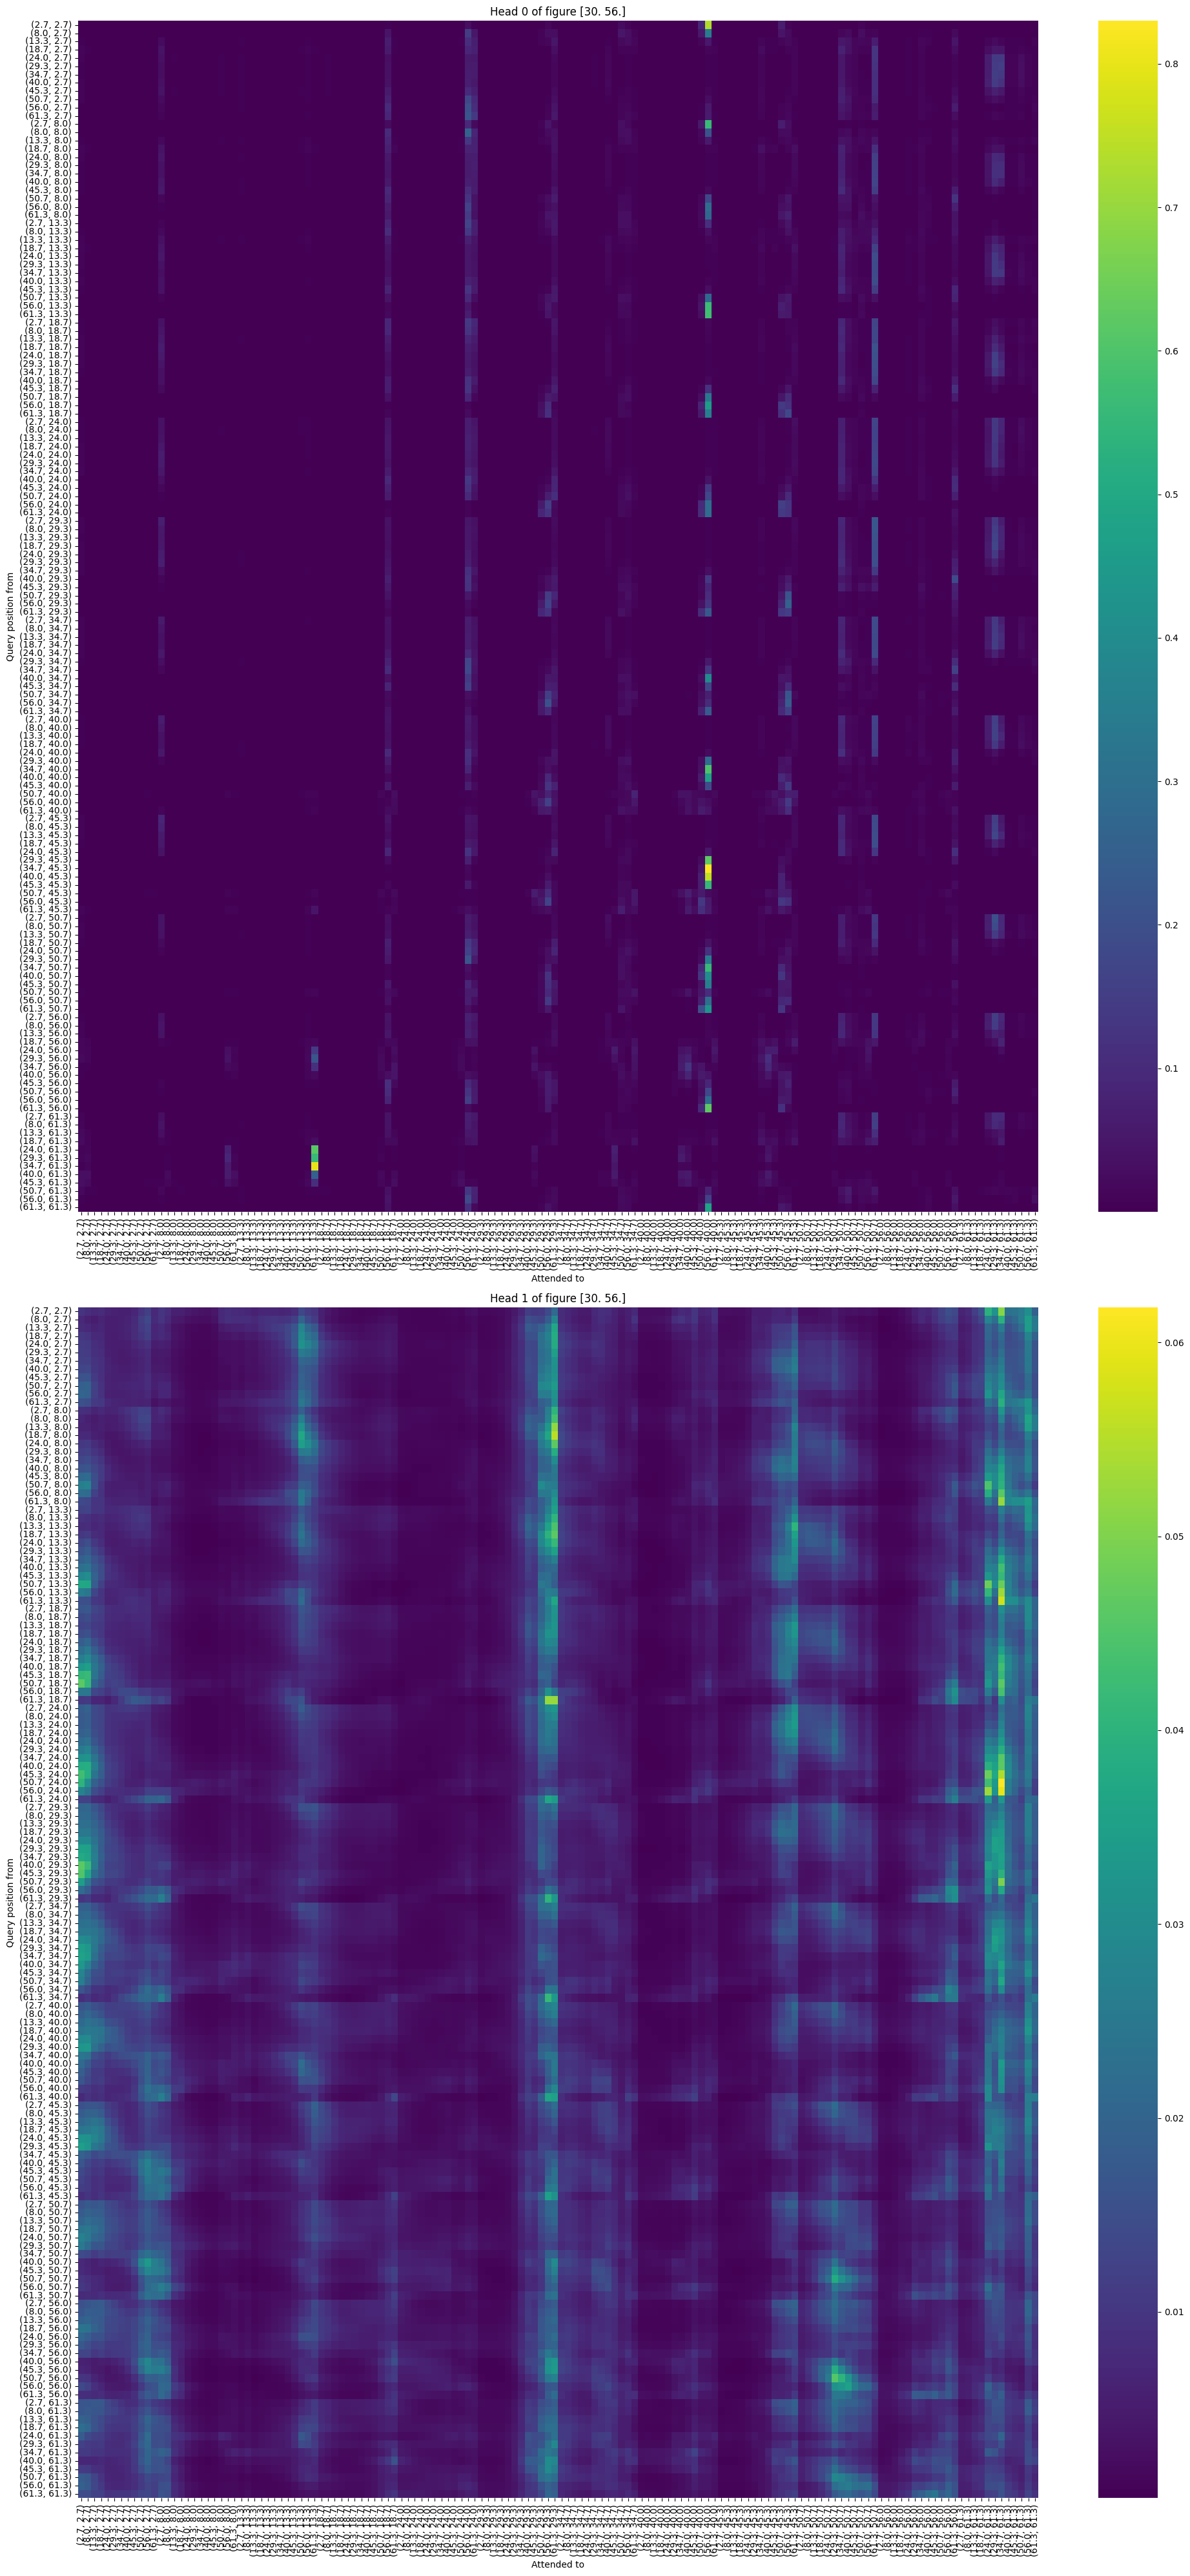

Target: [18. 27.]
Prediction: [20.646185 29.722576]


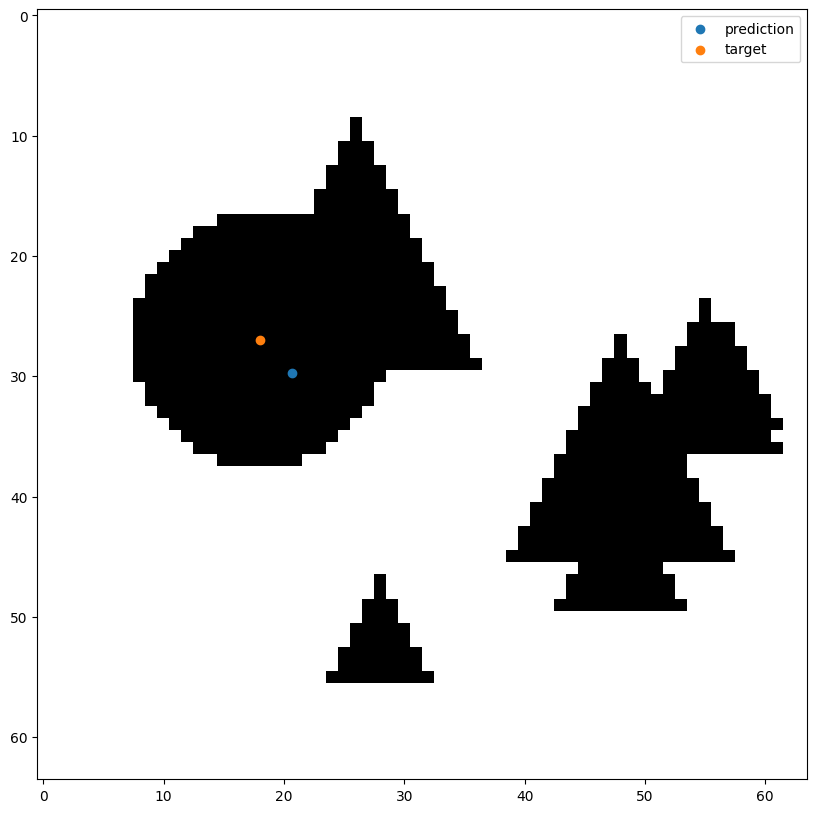

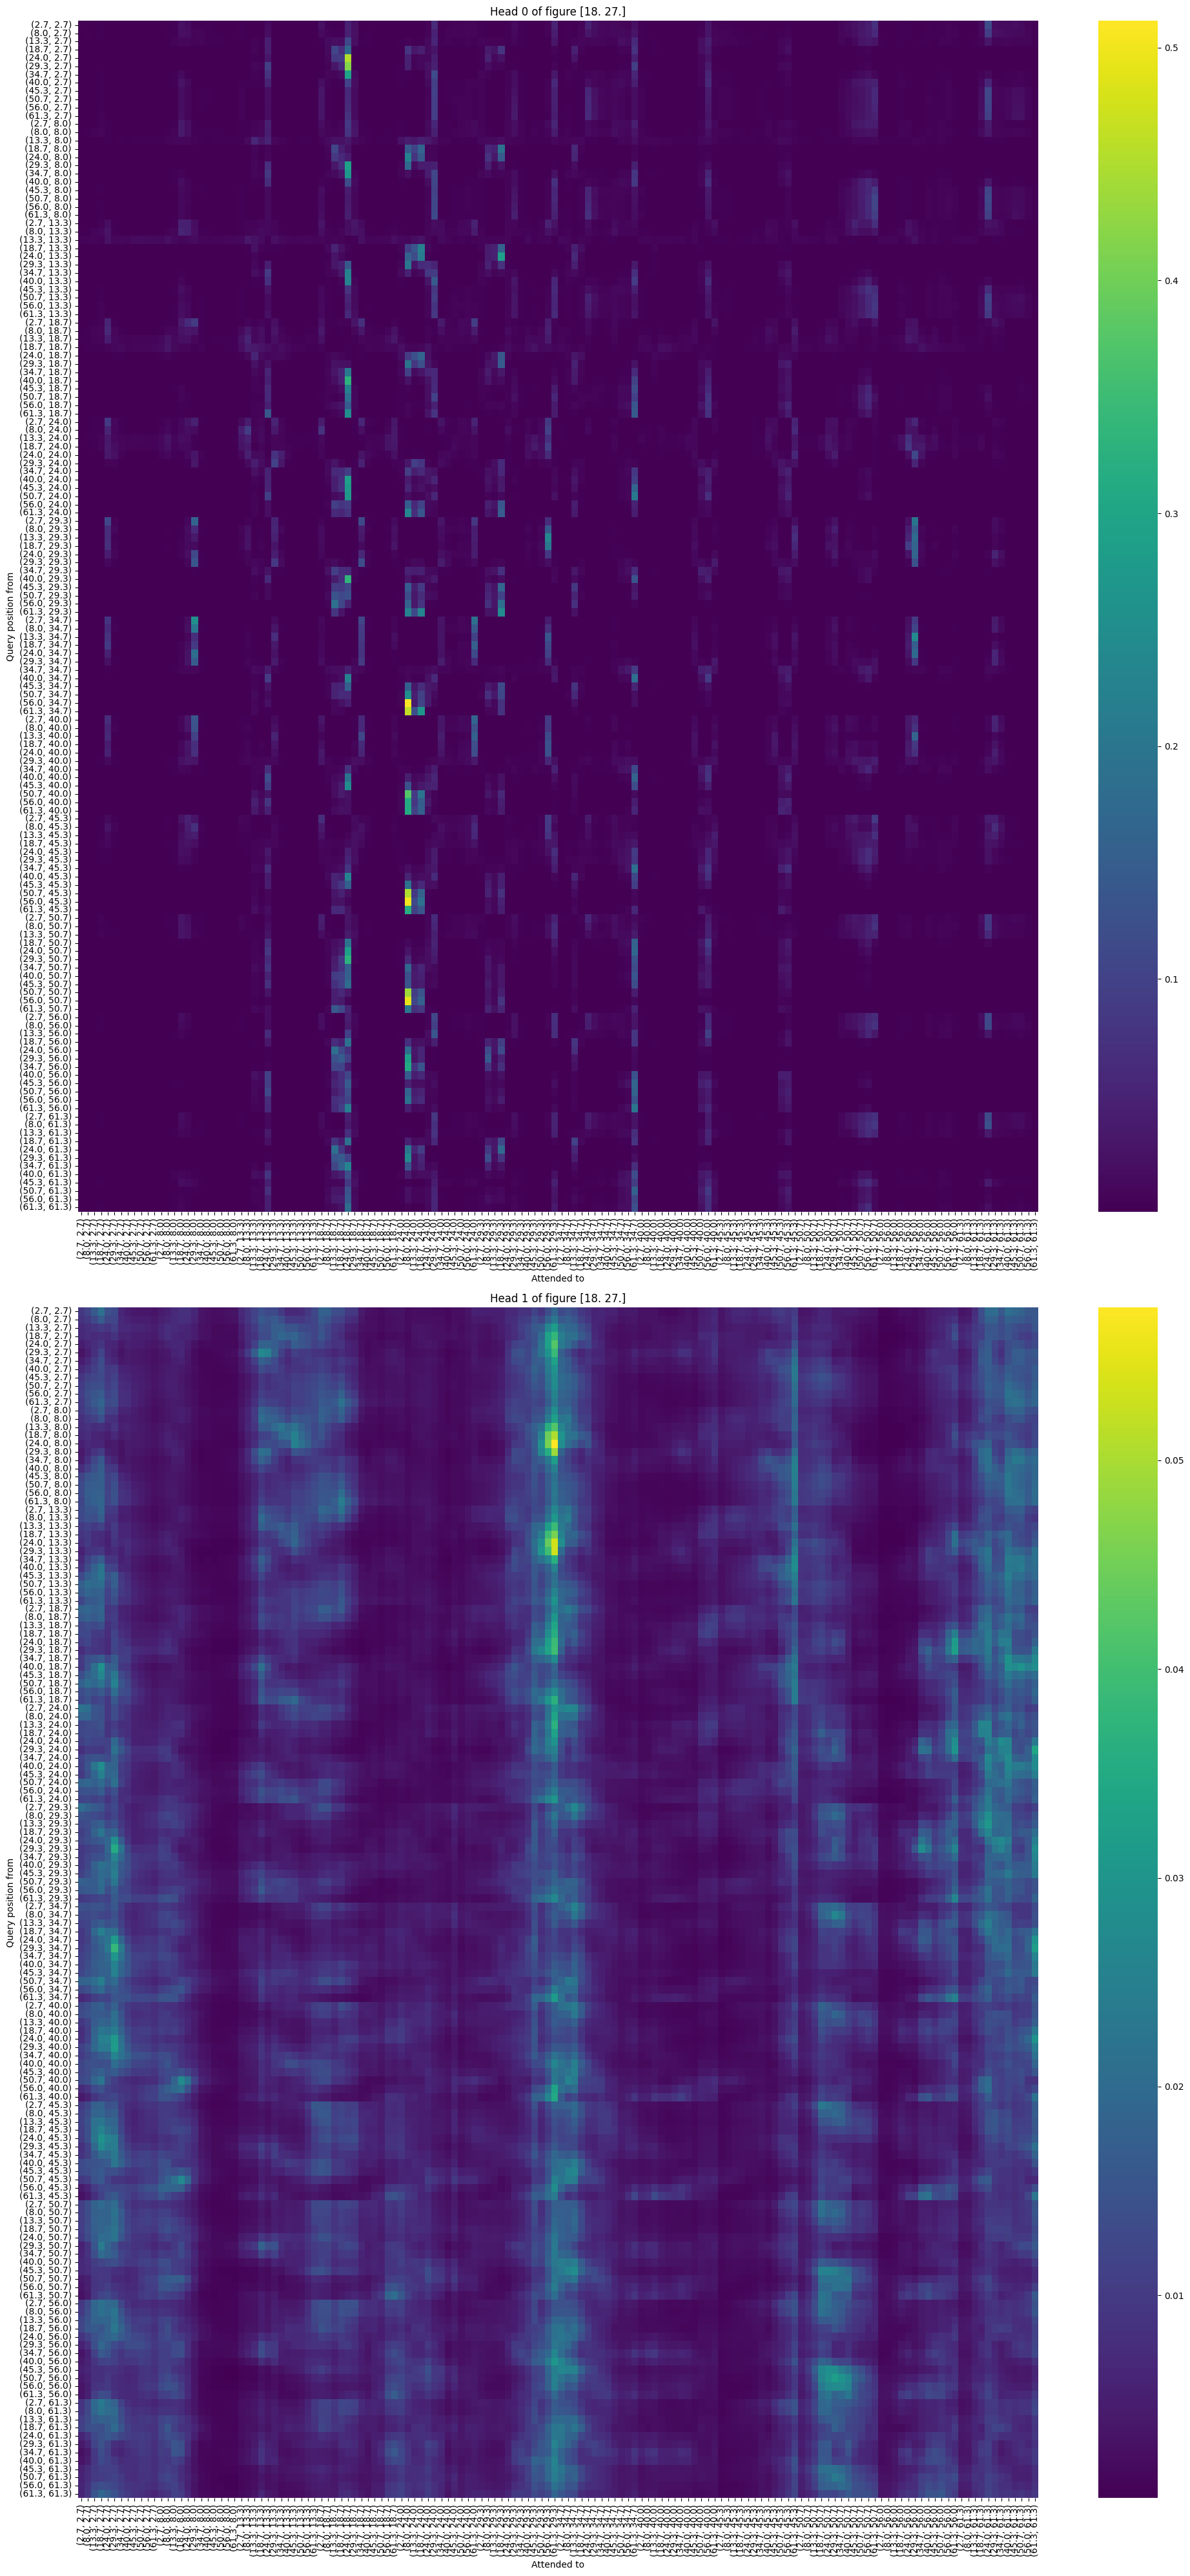

In [31]:
test(model_wo_offset,num_test=5)

### Model with offset

In [27]:
mlp_head_2=MLP(channels=[32,8,2],lin_dropout=0.1)
model_with_offset=Model_with_offset(model=base_model,mlp_head=mlp_head,mlp_head_2=mlp_head_2,grid=grid)
model_with_offset.to(device)
train_loss_history_offset, train_loss_history_epochs_offset= train_model(model_with_offset,epochs=1000)

Working on cuda
Epoch 0: batch 100: Avg Loss in last 100 batches: 1380.7240002441406
Epoch 0: batch 200: Avg Loss in last 100 batches: 1385.595291748047
Epoch 1: batch 100: Avg Loss in last 100 batches: 1417.862071533203
Epoch 1: batch 200: Avg Loss in last 100 batches: 1380.368012084961
Epoch 2: batch 100: Avg Loss in last 100 batches: 1375.2792712402343
Epoch 2: batch 200: Avg Loss in last 100 batches: 1473.4887133789061
Epoch 3: batch 100: Avg Loss in last 100 batches: 1423.457681274414
Epoch 3: batch 200: Avg Loss in last 100 batches: 1466.58271484375
Epoch 4: batch 100: Avg Loss in last 100 batches: 1341.1393286132814
Epoch 4: batch 200: Avg Loss in last 100 batches: 1513.2032055664063
Epoch 5: batch 100: Avg Loss in last 100 batches: 1413.9335150146485
Epoch 5: batch 200: Avg Loss in last 100 batches: 1477.5325451660156
Epoch 6: batch 100: Avg Loss in last 100 batches: 1386.6206909179687
Epoch 6: batch 200: Avg Loss in last 100 batches: 1447.1115197753907
Epoch 7: batch 100: Avg 

Epoch 59: batch 100: Avg Loss in last 100 batches: 1551.9299011230469
Epoch 59: batch 200: Avg Loss in last 100 batches: 1454.090376586914
Epoch 60: batch 100: Avg Loss in last 100 batches: 1502.6410357666016
Epoch 60: batch 200: Avg Loss in last 100 batches: 1292.062553100586
Epoch 61: batch 100: Avg Loss in last 100 batches: 1379.8246514892578
Epoch 61: batch 200: Avg Loss in last 100 batches: 1449.229400024414
Epoch 62: batch 100: Avg Loss in last 100 batches: 1449.1441104125977
Epoch 62: batch 200: Avg Loss in last 100 batches: 1435.3570892333985
Epoch 63: batch 100: Avg Loss in last 100 batches: 1513.3031134033204
Epoch 63: batch 200: Avg Loss in last 100 batches: 1504.1208184814452
Epoch 64: batch 100: Avg Loss in last 100 batches: 1429.9960595703126
Epoch 64: batch 200: Avg Loss in last 100 batches: 1404.7729022216797
Epoch 65: batch 100: Avg Loss in last 100 batches: 1328.1954571533204
Epoch 65: batch 200: Avg Loss in last 100 batches: 1429.034652709961
Epoch 66: batch 100: Avg

Epoch 118: batch 100: Avg Loss in last 100 batches: 1371.0043463134766
Epoch 118: batch 200: Avg Loss in last 100 batches: 1372.986868286133
Epoch 119: batch 100: Avg Loss in last 100 batches: 1396.149132080078
Epoch 119: batch 200: Avg Loss in last 100 batches: 1334.5804583740235
Epoch 120: batch 100: Avg Loss in last 100 batches: 1302.4766009521484
Epoch 120: batch 200: Avg Loss in last 100 batches: 1317.6581677246095
Epoch 121: batch 100: Avg Loss in last 100 batches: 1286.0954040527345
Epoch 121: batch 200: Avg Loss in last 100 batches: 1373.6757568359376
Epoch 122: batch 100: Avg Loss in last 100 batches: 1325.600916748047
Epoch 122: batch 200: Avg Loss in last 100 batches: 1374.3493096923828
Epoch 123: batch 100: Avg Loss in last 100 batches: 1311.7830499267577
Epoch 123: batch 200: Avg Loss in last 100 batches: 1338.196280517578
Epoch 124: batch 100: Avg Loss in last 100 batches: 1311.6456231689453
Epoch 124: batch 200: Avg Loss in last 100 batches: 1331.0778033447266
Epoch 125:

Epoch 176: batch 100: Avg Loss in last 100 batches: 1245.8337438964843
Epoch 176: batch 200: Avg Loss in last 100 batches: 1337.3051110839845
Epoch 177: batch 100: Avg Loss in last 100 batches: 1283.3440161132812
Epoch 177: batch 200: Avg Loss in last 100 batches: 1314.9790234375
Epoch 178: batch 100: Avg Loss in last 100 batches: 1324.2644525146484
Epoch 178: batch 200: Avg Loss in last 100 batches: 1220.766600341797
Epoch 179: batch 100: Avg Loss in last 100 batches: 1236.8871295166016
Epoch 179: batch 200: Avg Loss in last 100 batches: 1254.1144750976562
Epoch 180: batch 100: Avg Loss in last 100 batches: 1337.6487280273439
Epoch 180: batch 200: Avg Loss in last 100 batches: 1309.4316430664062
Epoch 181: batch 100: Avg Loss in last 100 batches: 1312.321904296875
Epoch 181: batch 200: Avg Loss in last 100 batches: 1257.731018676758
Epoch 182: batch 100: Avg Loss in last 100 batches: 1315.8794171142579
Epoch 182: batch 200: Avg Loss in last 100 batches: 1381.2506732177735
Epoch 183: b

Epoch 234: batch 100: Avg Loss in last 100 batches: 1243.0035177612306
Epoch 234: batch 200: Avg Loss in last 100 batches: 1132.2148803710938
Epoch 235: batch 100: Avg Loss in last 100 batches: 1212.7690124511719
Epoch 235: batch 200: Avg Loss in last 100 batches: 1326.1295294189454
Epoch 236: batch 100: Avg Loss in last 100 batches: 1240.0722387695312
Epoch 236: batch 200: Avg Loss in last 100 batches: 1212.4407568359375
Epoch 237: batch 100: Avg Loss in last 100 batches: 1169.4776513671875
Epoch 237: batch 200: Avg Loss in last 100 batches: 1141.1894659423829
Epoch 238: batch 100: Avg Loss in last 100 batches: 1224.609102783203
Epoch 238: batch 200: Avg Loss in last 100 batches: 1167.7960400390625
Epoch 239: batch 100: Avg Loss in last 100 batches: 1229.002815246582
Epoch 239: batch 200: Avg Loss in last 100 batches: 1211.2584564208985
Epoch 240: batch 100: Avg Loss in last 100 batches: 1331.3420349121093
Epoch 240: batch 200: Avg Loss in last 100 batches: 1299.8658856201173
Epoch 24

Epoch 292: batch 100: Avg Loss in last 100 batches: 1223.0762811279296
Epoch 292: batch 200: Avg Loss in last 100 batches: 1285.755369873047
Epoch 293: batch 100: Avg Loss in last 100 batches: 1208.1249655151366
Epoch 293: batch 200: Avg Loss in last 100 batches: 1131.1403771972657
Epoch 294: batch 100: Avg Loss in last 100 batches: 1128.7975872802735
Epoch 294: batch 200: Avg Loss in last 100 batches: 1232.932133178711
Epoch 295: batch 100: Avg Loss in last 100 batches: 1300.5981323242188
Epoch 295: batch 200: Avg Loss in last 100 batches: 1224.6580596923827
Epoch 296: batch 100: Avg Loss in last 100 batches: 1107.2562084960937
Epoch 296: batch 200: Avg Loss in last 100 batches: 1236.2437768554687
Epoch 297: batch 100: Avg Loss in last 100 batches: 1170.1686950683593
Epoch 297: batch 200: Avg Loss in last 100 batches: 1216.8375238037108
Epoch 298: batch 100: Avg Loss in last 100 batches: 1148.9574618530273
Epoch 298: batch 200: Avg Loss in last 100 batches: 1277.9431176757812
Epoch 29

Epoch 350: batch 100: Avg Loss in last 100 batches: 1149.0016094970704
Epoch 350: batch 200: Avg Loss in last 100 batches: 1110.5062438964844
Epoch 351: batch 100: Avg Loss in last 100 batches: 1222.3119778442383
Epoch 351: batch 200: Avg Loss in last 100 batches: 1238.62966796875
Epoch 352: batch 100: Avg Loss in last 100 batches: 1199.207366027832
Epoch 352: batch 200: Avg Loss in last 100 batches: 1182.736978149414
Epoch 353: batch 100: Avg Loss in last 100 batches: 1225.0206820678711
Epoch 353: batch 200: Avg Loss in last 100 batches: 1182.8817175292968
Epoch 354: batch 100: Avg Loss in last 100 batches: 1173.1209942626954
Epoch 354: batch 200: Avg Loss in last 100 batches: 1219.779449157715
Epoch 355: batch 100: Avg Loss in last 100 batches: 1183.6451647949218
Epoch 355: batch 200: Avg Loss in last 100 batches: 1143.052265625
Epoch 356: batch 100: Avg Loss in last 100 batches: 1249.9088592529297
Epoch 356: batch 200: Avg Loss in last 100 batches: 1161.119054260254
Epoch 357: batch

Epoch 408: batch 200: Avg Loss in last 100 batches: 1116.8998458862304
Epoch 409: batch 100: Avg Loss in last 100 batches: 1158.7605487060546
Epoch 409: batch 200: Avg Loss in last 100 batches: 1239.1162814331055
Epoch 410: batch 100: Avg Loss in last 100 batches: 1183.1076782226562
Epoch 410: batch 200: Avg Loss in last 100 batches: 1165.208434448242
Epoch 411: batch 100: Avg Loss in last 100 batches: 1131.1138671875
Epoch 411: batch 200: Avg Loss in last 100 batches: 1151.613497314453
Epoch 412: batch 100: Avg Loss in last 100 batches: 1169.5687921142578
Epoch 412: batch 200: Avg Loss in last 100 batches: 1160.3343408203125
Epoch 413: batch 100: Avg Loss in last 100 batches: 1115.2916299438477
Epoch 413: batch 200: Avg Loss in last 100 batches: 1194.0521142578125
Epoch 414: batch 100: Avg Loss in last 100 batches: 1142.2945639038087
Epoch 414: batch 200: Avg Loss in last 100 batches: 1220.5302560424805
Epoch 415: batch 100: Avg Loss in last 100 batches: 1230.1695361328125
Epoch 415: 

Epoch 466: batch 200: Avg Loss in last 100 batches: 1155.9305490112304
Epoch 467: batch 100: Avg Loss in last 100 batches: 1097.46426361084
Epoch 467: batch 200: Avg Loss in last 100 batches: 1258.6284008789062
Epoch 468: batch 100: Avg Loss in last 100 batches: 1164.0736584472656
Epoch 468: batch 200: Avg Loss in last 100 batches: 1164.1306890869141
Epoch 469: batch 100: Avg Loss in last 100 batches: 1163.2783590698243
Epoch 469: batch 200: Avg Loss in last 100 batches: 1139.5222424316407
Epoch 470: batch 100: Avg Loss in last 100 batches: 1037.997844543457
Epoch 470: batch 200: Avg Loss in last 100 batches: 1123.4611694335938
Epoch 471: batch 100: Avg Loss in last 100 batches: 1182.5612966918945
Epoch 471: batch 200: Avg Loss in last 100 batches: 1152.3972500610353
Epoch 472: batch 100: Avg Loss in last 100 batches: 1132.5742590332031
Epoch 472: batch 200: Avg Loss in last 100 batches: 1186.7051007080079
Epoch 473: batch 100: Avg Loss in last 100 batches: 1173.1486923217774
Epoch 473

Epoch 525: batch 100: Avg Loss in last 100 batches: 1114.8889474487305
Epoch 525: batch 200: Avg Loss in last 100 batches: 1238.2360482788085
Epoch 526: batch 100: Avg Loss in last 100 batches: 1173.7002703857422
Epoch 526: batch 200: Avg Loss in last 100 batches: 1135.9508813476561
Epoch 527: batch 100: Avg Loss in last 100 batches: 1096.3976232910156
Epoch 527: batch 200: Avg Loss in last 100 batches: 1125.0820825195312
Epoch 528: batch 100: Avg Loss in last 100 batches: 1138.6123373413086
Epoch 528: batch 200: Avg Loss in last 100 batches: 1213.21016204834
Epoch 529: batch 100: Avg Loss in last 100 batches: 1120.834156188965
Epoch 529: batch 200: Avg Loss in last 100 batches: 1188.098250427246
Epoch 530: batch 100: Avg Loss in last 100 batches: 1168.1576928710938
Epoch 530: batch 200: Avg Loss in last 100 batches: 1237.0298440551758
Epoch 531: batch 100: Avg Loss in last 100 batches: 1147.0785229492187
Epoch 531: batch 200: Avg Loss in last 100 batches: 1077.8234341430664
Epoch 532:

Epoch 583: batch 100: Avg Loss in last 100 batches: 1159.164698791504
Epoch 583: batch 200: Avg Loss in last 100 batches: 1194.3172232055665
Epoch 584: batch 100: Avg Loss in last 100 batches: 1117.8109188842773
Epoch 584: batch 200: Avg Loss in last 100 batches: 1102.2679272460937
Epoch 585: batch 100: Avg Loss in last 100 batches: 1108.2856805419922
Epoch 585: batch 200: Avg Loss in last 100 batches: 1153.1241046142577
Epoch 586: batch 100: Avg Loss in last 100 batches: 1080.1306240844726
Epoch 586: batch 200: Avg Loss in last 100 batches: 1156.5875811767578
Epoch 587: batch 100: Avg Loss in last 100 batches: 1111.3255603027344
Epoch 587: batch 200: Avg Loss in last 100 batches: 1106.661107788086
Epoch 588: batch 100: Avg Loss in last 100 batches: 1259.0037530517577
Epoch 588: batch 200: Avg Loss in last 100 batches: 1134.6591394042969
Epoch 589: batch 100: Avg Loss in last 100 batches: 1078.3052630615234
Epoch 589: batch 200: Avg Loss in last 100 batches: 1103.5422799682617
Epoch 59

Epoch 641: batch 100: Avg Loss in last 100 batches: 1132.3858840942382
Epoch 641: batch 200: Avg Loss in last 100 batches: 1113.2508306884765
Epoch 642: batch 100: Avg Loss in last 100 batches: 1105.933116455078
Epoch 642: batch 200: Avg Loss in last 100 batches: 1126.8991131591797
Epoch 643: batch 100: Avg Loss in last 100 batches: 1174.5484924316406
Epoch 643: batch 200: Avg Loss in last 100 batches: 1163.0074380493163
Epoch 644: batch 100: Avg Loss in last 100 batches: 1162.5612005615235
Epoch 644: batch 200: Avg Loss in last 100 batches: 1177.846346130371
Epoch 645: batch 100: Avg Loss in last 100 batches: 1119.8458508300782
Epoch 645: batch 200: Avg Loss in last 100 batches: 1119.3790200805663
Epoch 646: batch 100: Avg Loss in last 100 batches: 1086.6049169921876
Epoch 646: batch 200: Avg Loss in last 100 batches: 1143.7812017822266
Epoch 647: batch 100: Avg Loss in last 100 batches: 1112.720310974121
Epoch 647: batch 200: Avg Loss in last 100 batches: 1119.1169067382812
Epoch 648

Epoch 699: batch 100: Avg Loss in last 100 batches: 1171.720256652832
Epoch 699: batch 200: Avg Loss in last 100 batches: 1069.8103811645508
Epoch 700: batch 100: Avg Loss in last 100 batches: 1108.5392407226564
Epoch 700: batch 200: Avg Loss in last 100 batches: 1070.9793661499023
Epoch 701: batch 100: Avg Loss in last 100 batches: 1121.8705081176759
Epoch 701: batch 200: Avg Loss in last 100 batches: 1057.975389099121
Epoch 702: batch 100: Avg Loss in last 100 batches: 1091.3159521484374
Epoch 702: batch 200: Avg Loss in last 100 batches: 1081.8583255004883
Epoch 703: batch 100: Avg Loss in last 100 batches: 1246.7811651611328
Epoch 703: batch 200: Avg Loss in last 100 batches: 1099.6995236206055
Epoch 704: batch 100: Avg Loss in last 100 batches: 1126.251516723633
Epoch 704: batch 200: Avg Loss in last 100 batches: 1221.2775527954102
Epoch 705: batch 100: Avg Loss in last 100 batches: 1142.8362643432617
Epoch 705: batch 200: Avg Loss in last 100 batches: 1062.0430078125
Epoch 706: b

Epoch 757: batch 100: Avg Loss in last 100 batches: 1267.7720413208008
Epoch 757: batch 200: Avg Loss in last 100 batches: 1163.9817279052734
Epoch 758: batch 100: Avg Loss in last 100 batches: 1222.3037945556641
Epoch 758: batch 200: Avg Loss in last 100 batches: 1093.5102182006835
Epoch 759: batch 100: Avg Loss in last 100 batches: 1166.1555700683593
Epoch 759: batch 200: Avg Loss in last 100 batches: 1150.1390020751953
Epoch 760: batch 100: Avg Loss in last 100 batches: 1117.2510739135741
Epoch 760: batch 200: Avg Loss in last 100 batches: 1215.6686624145507
Epoch 761: batch 100: Avg Loss in last 100 batches: 1125.9907781982422
Epoch 761: batch 200: Avg Loss in last 100 batches: 1103.4353213500976
Epoch 762: batch 100: Avg Loss in last 100 batches: 1093.0163748168945
Epoch 762: batch 200: Avg Loss in last 100 batches: 1116.0721618652344
Epoch 763: batch 100: Avg Loss in last 100 batches: 1096.4022497558594
Epoch 763: batch 200: Avg Loss in last 100 batches: 1085.5771826171874
Epoch 

Epoch 815: batch 100: Avg Loss in last 100 batches: 1131.4681909179687
Epoch 815: batch 200: Avg Loss in last 100 batches: 1178.8784924316406
Epoch 816: batch 100: Avg Loss in last 100 batches: 1051.23416015625
Epoch 816: batch 200: Avg Loss in last 100 batches: 1114.0871786499024
Epoch 817: batch 100: Avg Loss in last 100 batches: 999.5014102172852
Epoch 817: batch 200: Avg Loss in last 100 batches: 1085.2981381225586
Epoch 818: batch 100: Avg Loss in last 100 batches: 1173.9054315185547
Epoch 818: batch 200: Avg Loss in last 100 batches: 1184.5094714355469
Epoch 819: batch 100: Avg Loss in last 100 batches: 1083.9736312866212
Epoch 819: batch 200: Avg Loss in last 100 batches: 1177.5591552734375
Epoch 820: batch 100: Avg Loss in last 100 batches: 1043.0904287719727
Epoch 820: batch 200: Avg Loss in last 100 batches: 1033.6952194213868
Epoch 821: batch 100: Avg Loss in last 100 batches: 1107.334397277832
Epoch 821: batch 200: Avg Loss in last 100 batches: 1067.4169381713866
Epoch 822:

Epoch 873: batch 100: Avg Loss in last 100 batches: 1109.8562506103515
Epoch 873: batch 200: Avg Loss in last 100 batches: 1062.2847073364258
Epoch 874: batch 100: Avg Loss in last 100 batches: 1034.967587585449
Epoch 874: batch 200: Avg Loss in last 100 batches: 1142.4486196899413
Epoch 875: batch 100: Avg Loss in last 100 batches: 1057.9864501953125
Epoch 875: batch 200: Avg Loss in last 100 batches: 1091.52826171875
Epoch 876: batch 100: Avg Loss in last 100 batches: 1078.259192199707
Epoch 876: batch 200: Avg Loss in last 100 batches: 1172.076809387207
Epoch 877: batch 100: Avg Loss in last 100 batches: 1131.6537631225585
Epoch 877: batch 200: Avg Loss in last 100 batches: 1122.08748046875
Epoch 878: batch 100: Avg Loss in last 100 batches: 1069.5207473754883
Epoch 878: batch 200: Avg Loss in last 100 batches: 1053.7558709716798
Epoch 879: batch 100: Avg Loss in last 100 batches: 1087.7956420898438
Epoch 879: batch 200: Avg Loss in last 100 batches: 1166.9336965942382
Epoch 880: ba

Epoch 931: batch 100: Avg Loss in last 100 batches: 1096.603134765625
Epoch 931: batch 200: Avg Loss in last 100 batches: 1119.5752133178712
Epoch 932: batch 100: Avg Loss in last 100 batches: 1041.6209796142577
Epoch 932: batch 200: Avg Loss in last 100 batches: 1080.1872109985352
Epoch 933: batch 100: Avg Loss in last 100 batches: 1079.639888305664
Epoch 933: batch 200: Avg Loss in last 100 batches: 1140.825655822754
Epoch 934: batch 100: Avg Loss in last 100 batches: 1183.7985458374023
Epoch 934: batch 200: Avg Loss in last 100 batches: 1150.5406784057618
Epoch 935: batch 100: Avg Loss in last 100 batches: 1156.4439651489258
Epoch 935: batch 200: Avg Loss in last 100 batches: 1075.4991198730468
Epoch 936: batch 100: Avg Loss in last 100 batches: 1108.1484469604493
Epoch 936: batch 200: Avg Loss in last 100 batches: 1065.1638555908203
Epoch 937: batch 100: Avg Loss in last 100 batches: 1027.5390475463867
Epoch 937: batch 200: Avg Loss in last 100 batches: 1082.7822665405274
Epoch 938

Epoch 989: batch 100: Avg Loss in last 100 batches: 1102.0632592773438
Epoch 989: batch 200: Avg Loss in last 100 batches: 1091.649528503418
Epoch 990: batch 100: Avg Loss in last 100 batches: 1059.783850402832
Epoch 990: batch 200: Avg Loss in last 100 batches: 1086.1459634399414
Epoch 991: batch 100: Avg Loss in last 100 batches: 1040.873837585449
Epoch 991: batch 200: Avg Loss in last 100 batches: 1092.5081634521484
Epoch 992: batch 100: Avg Loss in last 100 batches: 1129.438289794922
Epoch 992: batch 200: Avg Loss in last 100 batches: 1010.1580590820313
Epoch 993: batch 100: Avg Loss in last 100 batches: 1157.3316265869141
Epoch 993: batch 200: Avg Loss in last 100 batches: 1109.5760760498047
Epoch 994: batch 100: Avg Loss in last 100 batches: 1114.421573486328
Epoch 994: batch 200: Avg Loss in last 100 batches: 1016.5750659179688
Epoch 995: batch 100: Avg Loss in last 100 batches: 1090.1498077392578
Epoch 995: batch 200: Avg Loss in last 100 batches: 1127.5508905029296
Epoch 996: 

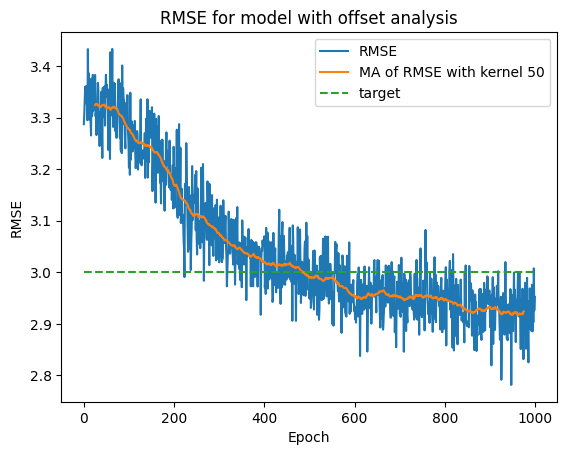

In [48]:
plt.plot(np.sqrt(train_loss_history_epochs_offset),label='RMSE')
plt.plot(np.arange(25,976),np.convolve(np.sqrt(train_loss_history_epochs_offset),np.ones(50), mode='valid' )/50, label='MA of RMSE with kernel 50' )
plt.title('RMSE for model with offset analysis')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.plot(np.arange(1000), 3*np.ones(1000), linestyle='--',label='target')
plt.legend()
plt.show()

In [33]:
torch.save(base_model.state_dict(),'base_model.pt')
torch.save(mlp_head.state_dict(),'mlp_head.pt')
torch.save(mlp_head_2.state_dict(),'mlp_head_2.pt')


<All keys matched successfully>